<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Communication  Systems <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Fall 2023<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    S Moein Makkiyan

____

# Personal Data

In [2]:
# Set your student number
student_number = '400101204'
Name = 'MohammadParsa'
Last_Name = 'Dini'

## Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft, ifft, fftfreq
from IPython.display import HTML
from scipy.signal import fftconvolve
from scipy.signal import butter, filtfilt
from scipy.fftpack import fft, fftfreq, fftshift,ifft,ifftshift
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from tqdm import tqdm
import wave, sys

## 2.1 :

"divider"  takes an input list and separates its elements into two arrays - one containing elements at even indices and another containing elements at odd indices. This is So close to the Real Time model !

In [4]:
def divider(input):
    input = np.array(input)
    even_indices = input[::2]
    odd_indices = input[1::2]
    return even_indices, odd_indices

In [5]:
bn = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]

b1, b2 = divider(bn)
print("b1[n] = ", b1)
print("b2[n] = ", b2)

b1[n] =  [1 1 0 1 1 1 0 1 1]
b2[n] =  [0 0 1 0 1 1 0 0 1]


## 2.2 :

This code defines a function called pulseShaping that performs pulse shaping on a sequence of binary values. It takes three arguments:

input: A sequence of binary values (0s and 1s).

zeroPulse: The pulse shape for the binary digit 0.

onePulse: The pulse shape for the binary digit 1.

In [6]:
def pulseShaping(input, zeroPulse, onePulse):
    return np.concatenate([zeroPulse if b == 0 else onePulse for b in input])

In [7]:
# TEST
bi = b1
zero_pulse = [0, 0, 0]
one_pulse = [1, 0, 1]
# one_pulse = [1.5, 0, 1.5]

x1 = pulseShaping(bi, zero_pulse, one_pulse)
print("x1[n] =", x1)

bi = b2
x2 = pulseShaping(bi, zero_pulse, one_pulse)
print("x2[n] =", x2)

x1[n] = [1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1]
x2[n] = [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1]


## 2.3 :

This code defines a function called analogMod that performs analog modulation, specifically amplitude modulation (AM). It takes four arguments:

- input_sig1: The first input signal.

- input_sig2: The second input signal.

- fc: The carrier frequency.

- fs: The sampling frequency.

t = np.arange(0, (len(input_sig1)) / fs, 1 / fs): This line creates a time vector t using NumPy's arange function. It spans from 0 to the duration of the input signals, with a step size of 1/fs. This vector represents the time instances at which the modulation occurs.

xc1 = input_sig1 * np.cos(2 * np.pi * fc * t): This line modulates the first input signal input_sig1 using amplitude modulation with a carrier frequency fc. It multiplies input_sig1 by the cosine of the carrier frequency oscillating over time.

xc2 = input_sig2 * np.sin(2 * np.pi * fc * t): Similarly, this line modulates the second input signal input_sig2 using amplitude modulation with a carrier frequency fc. It multiplies input_sig2 by the sine of the carrier frequency oscillating over time.

modulated_signal = xc1 + xc2: The modulated signal is obtained by adding the two modulated components. This step combines the amplitude-modulated versions of input_sig1 and input_sig2.

The function returns the modulated signal.


In [8]:

def analogMod(input_sig1, input_sig2, fc, fs):
    t = np.arange(0, (len(input_sig1)) / fs, 1 / fs)
    xc1 = input_sig1 * np.cos(2 * np.pi * fc * t)
    xc2 = input_sig2 * np.sin(2 * np.pi * fc * t)
    modulated_signal = xc1 + xc2
    return  modulated_signal

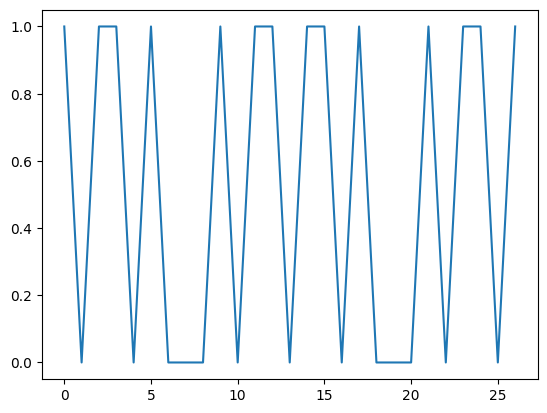

In [9]:
#TEST
fs = 1e3
fc = 10e3
xc = analogMod(x1, x2, fc, fs)
plt.plot(xc)

# 2.4 :

This code defines a function called channel that simulates a communication channel with bandpass characteristics. It takes four arguments:

-modulated_signal: The modulated signal to be transmitted through the channel.

-fc: The carrier frequency.

-fs: The sampling frequency.

-bandwidth: The bandwidth of the channel.


t = np.arange(0, (len(modulated_signal) - 1) / fs, 1 / fs): This line creates a time vector t similar to the analogMod function.

n = len(modulated_signal): The length of the modulated signal.

freq = fftshift(fftfreq(n, 1/fs)): Calculates the frequency vector using the Fast Fourier Transform (FFT). fftshift is used to center the frequencies.

spectrum_modulated = fftshift(fft(modulated_signal)): Computes the FFT of the modulated signal and shifts the frequency components.

a1 = fc + bandwidth and a2 = fc - bandwidth: Define the upper and lower limits of the bandpass channel.

u1 = np.logical_and(freq >= a2, freq <= a1) and u2 = np.logical_and(-freq >= a2, -freq < a1): Create logical masks for selecting the frequency components within the bandpass range.

u = u1 + u2: Combine the logical masks.

spectrum_modulated = spectrum_modulated * u: Apply the bandpass filter by zeroing out frequencies outside the specified range.

bandpass_signal = ifft(ifftshift(spectrum_modulated)).real: Perform the inverse FFT and shift the result to obtain the bandpass signal in the time domain.

The function returns the bandpass signal.

In [10]:



def channel(modulated_signal, fc, fs, bandwidth):
    t = np.arange(0, (len(modulated_signal) - 1) / fs, 1 / fs)

    n = len(modulated_signal)
    freq = fftshift(fftfreq(n, 1/fs))
    spectrum_modulated = fftshift(fft(modulated_signal))

    a1 = fc + bandwidth
    a2 = fc - bandwidth
    u1 = np.logical_and(freq >= a2, freq <= a1)
    u2 = np.logical_and(-freq >= a2, -freq < a1)
    u = u1 + u2
    spectrum_modulated = spectrum_modulated * u

    bandpass_signal = ifft(ifftshift(spectrum_modulated)).real

    return bandpass_signal



Chossing the best Bandwidth:

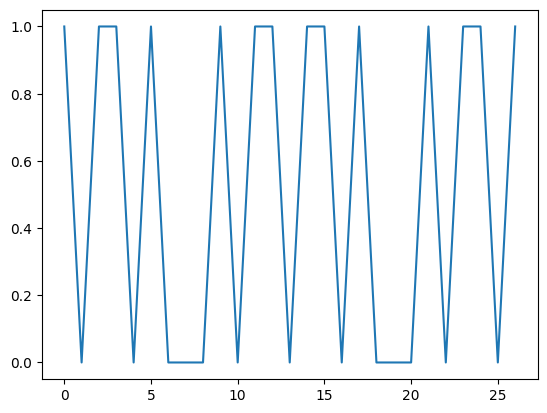

In [11]:
# TEST
bw = 0.4 * fc 
y = channel(xc, fs, fc, bw)
plt.plot(y)

This bandwidth is not enough:(!)

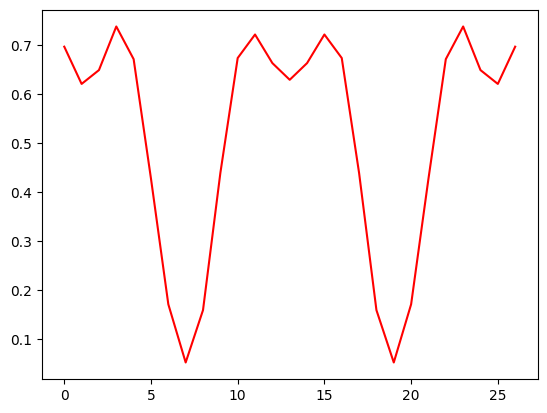

In [12]:
bw = 0.4 * fc - 2e3
y = channel(xc, fs, fc, bw)
plt.plot(y,color='red')

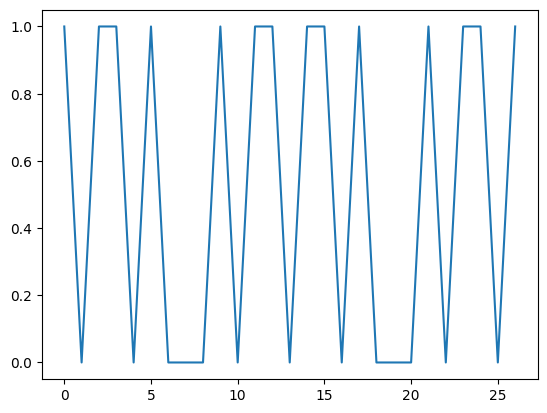

In [13]:
bw = 0.5 * fc 
y = channel(xc, fs, fc, bw)
plt.plot(y)

## 2.5 :

t = np.arange(0, len(signal)) / fs: This line creates a time vector t similar to previous functions.

demodulated_signal1 = signal * np.cos(2 * np.pi * fc * t) and demodulated_signal2 = signal * np.sin(2 * np.pi * fc * t): These lines multiply the received signal by the carrier frequency to perform demodulation. One signal is multiplied by the cosine term, and the other by the sine term.

freq = fftshift(fftfreq(len(demodulated_signal1), 1/fs)) and freq = fftshift(fftfreq(len(demodulated_signal2), 1/fs)): These lines calculate the frequency vectors for the two demodulated signals using FFT.

spectrum_demodulated1 = fftshift(fft(demodulated_signal1)) and spectrum_demodulated2 = fftshift(fft(demodulated_signal2)): These lines compute the FFT of the demodulated signals and shift the frequency components.

a1 = bandwidth and a2 = -bandwidth: Define the bandwidth of the demodulated signal.

u = np.logical_and(freq >= a2, freq <= a1): Create a logical mask for selecting the frequency components within the demodulated signal's bandwidth.

demodulated_signal_1 = ifft(ifftshift(spectrum_demodulated1 * u)) and demodulated_signal_2 = ifft(ifftshift(spectrum_demodulated2 * u)): These lines apply the bandpass filter to each demodulated signal by zeroing out frequencies outside the specified range and then perform the inverse FFT to obtain the demodulated signals in the time domain.

The function returns the two demodulated signals.

In [14]:

# def analogDemod(input_sig, fs, fc, bw, time_start=0):
#     t_stop = time_start + ((len(input_sig) - 1) / fs)
#     t = np.linspace(time_start, t_stop, len(input_sig))
    
#     y1, y2 = np.cos(2 * np.pi * fc * t) * input_sig, np.sin(2 * np.pi * fc * t) * input_sig
#     demodulated_s1 = idealFilter(y1, -1, bw, fs)
#     demodulated_s2 = idealFilter(y2, -1, bw, fs)
    
#     return demodulated_s1, demodulated_s2


# def analogDemod(signal, fs, bandwidth, fc):
        
#     t = np.arange(0, len(signal)) / fs
#     demodulated_signal1 = signal * np.cos(2 * np.pi * fc*t)
#     demodulated_signal2 = signal * np.sin(2 * np.pi * fc * t)
    
#     freq = fftshift(fftfreq(len(demodulated_signal1), 1/fs))
#     spectrum_demodulated1 = fftshift(fft(demodulated_signal1))
    
#     freq = fftshift(fftfreq(len(demodulated_signal2), 1/fs))
#     spectrum_demodulated2 = fftshift(fft(demodulated_signal2))
    
#     a1=bandwidth
#     a2=-bandwidth
#     u = np.logical_and(freq >= a2, freq <= a1)
    
#     demodulated_signal_1 = ifft(ifftshift(spectrum_demodulated1 * u))
#     demodulated_signal_2 = ifft(ifftshift(spectrum_demodulated2 * u))
    

#     return demodulated_signal_1, demodulated_signal_2

def analogDemod(signal, fs, bandwidth, fc):
    t = np.arange(0, len(signal)) / fs
    demodulated_signal1 = signal * np.cos(2 * np.pi * fc * t)
    demodulated_signal2 = signal * np.sin(2 * np.pi * fc * t)

    freq = fftshift(fftfreq(len(demodulated_signal1), 1/fs))
    spectrum_demodulated1 = fftshift(fft(demodulated_signal1))

    freq = fftshift(fftfreq(len(demodulated_signal2), 1/fs))
    spectrum_demodulated2 = fftshift(fft(demodulated_signal2))

    a1 = bandwidth
    a2 = -bandwidth
    u = np.logical_and(freq >= a2, freq <= a1)

    demodulated_signal_1 = ifft(ifftshift(spectrum_demodulated1 * u))
    demodulated_signal_2 = ifft(ifftshift(spectrum_demodulated2 * u))

    return demodulated_signal_1, demodulated_signal_2



c:\Users\Matin\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Matin\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


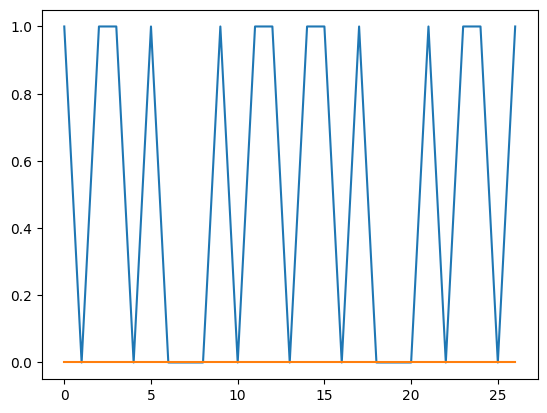

In [15]:
# TEST:
s1, s2 = analogDemod(y, fs, bw, fc)

plt.plot(s1)
plt.plot(s2)

## 2.6 :

output_matched_0 = fftconvolve(demodulated_signal, pulse_shape_0[::-1], mode='full') and output_matched_1 = fftconvolve(demodulated_signal, pulse_shape_1[::-1], mode='full'): These lines perform matched filtering using fftconvolve with the demodulated signal and the reversed pulse shapes ([::-1]). The mode is set to 'full' to ensure the output has the correct length.

estimated_bits = np.zeros(int(N/2)): Initialize an array to store the estimated bits. The size of the array is determined by halving the total number of bits N because each bit is estimated twice.

for i in output_matched_1[int(len(pulse_shape_0))-1::int(len(pulse_shape_0))]: This loop extracts samples from the matched filter output corresponding to the transitions between bits. It starts from the index corresponding to the end of the pulse shape for bit 0 and increments by the length of the pulse shape.

estimated_bits[j] = 1 if i >= 0 else 0: Estimates the transmitted bit based on the sign of the matched filter output at the transition point. If the value is greater than or equal to 0, it's assumed to be a bit 1; otherwise, it's assumed to be a bit 0.

The function returns the two matched filter outputs (output_matched_0 and output_matched_1) and the estimated bits.

In [43]:

# def matchedFilt(input_sig, zero_pulse, one_pulse):
#     filt_zero = np.flip(zero_pulse)
#     filt_one = np.flip(one_pulse)
#     match_filt_r1, match_filt_r0 = np.zeros(len(input_sig)), np.zeros(len(input_sig))
    
#     bit_num = int(len(input_sig) / len(zero_pulse))
#     match_filt_r1 = np.convolve(filt_one, input_sig, 'same') / len(filt_one)
#     match_filt_r0 = np.convolve(filt_zero, input_sig, 'same') / len(filt_zero)
    
#     bit_result = np.zeros(bit_num)
#     sample_time_filter_out = np.zeros(bit_num)
    
#     t0 = int(len(zero_pulse) / 2)
#     for i in range(bit_num):
#         if match_filt_r1[t0] > match_filt_r0[t0]:
#             bit_result[i] = 1
            
#         sample_time_filter_out[i] = match_filt_r1[t0]
#         t0 += len(zero_pulse)
    
#     # return (match_filt_r0, match_filt_r1), bit_result
#     return match_filt_r0, match_filt_r1, bit_result


def matchedFilt(demodulated_signal, pulse_shape_0, pulse_shape_1, N):
    output_matched_0 = fftconvolve(demodulated_signal, pulse_shape_0[::-1], mode='full')
    output_matched_1 = fftconvolve(demodulated_signal, pulse_shape_1[::-1], mode='full')
    
    estimated_bits = np.zeros(int(N/2))
    j = 0
    
    for i in output_matched_1[int(len(pulse_shape_0))-1::int(len(pulse_shape_0))]:
        estimated_bits[j] = 1 if i >= 0 else 0
        j += 1

    return output_matched_0, output_matched_1, estimated_bits


# 3:

# 3.1 :

Now Let's use the elements we defined!

Text(0.5, 1.0, 'b2[n]')

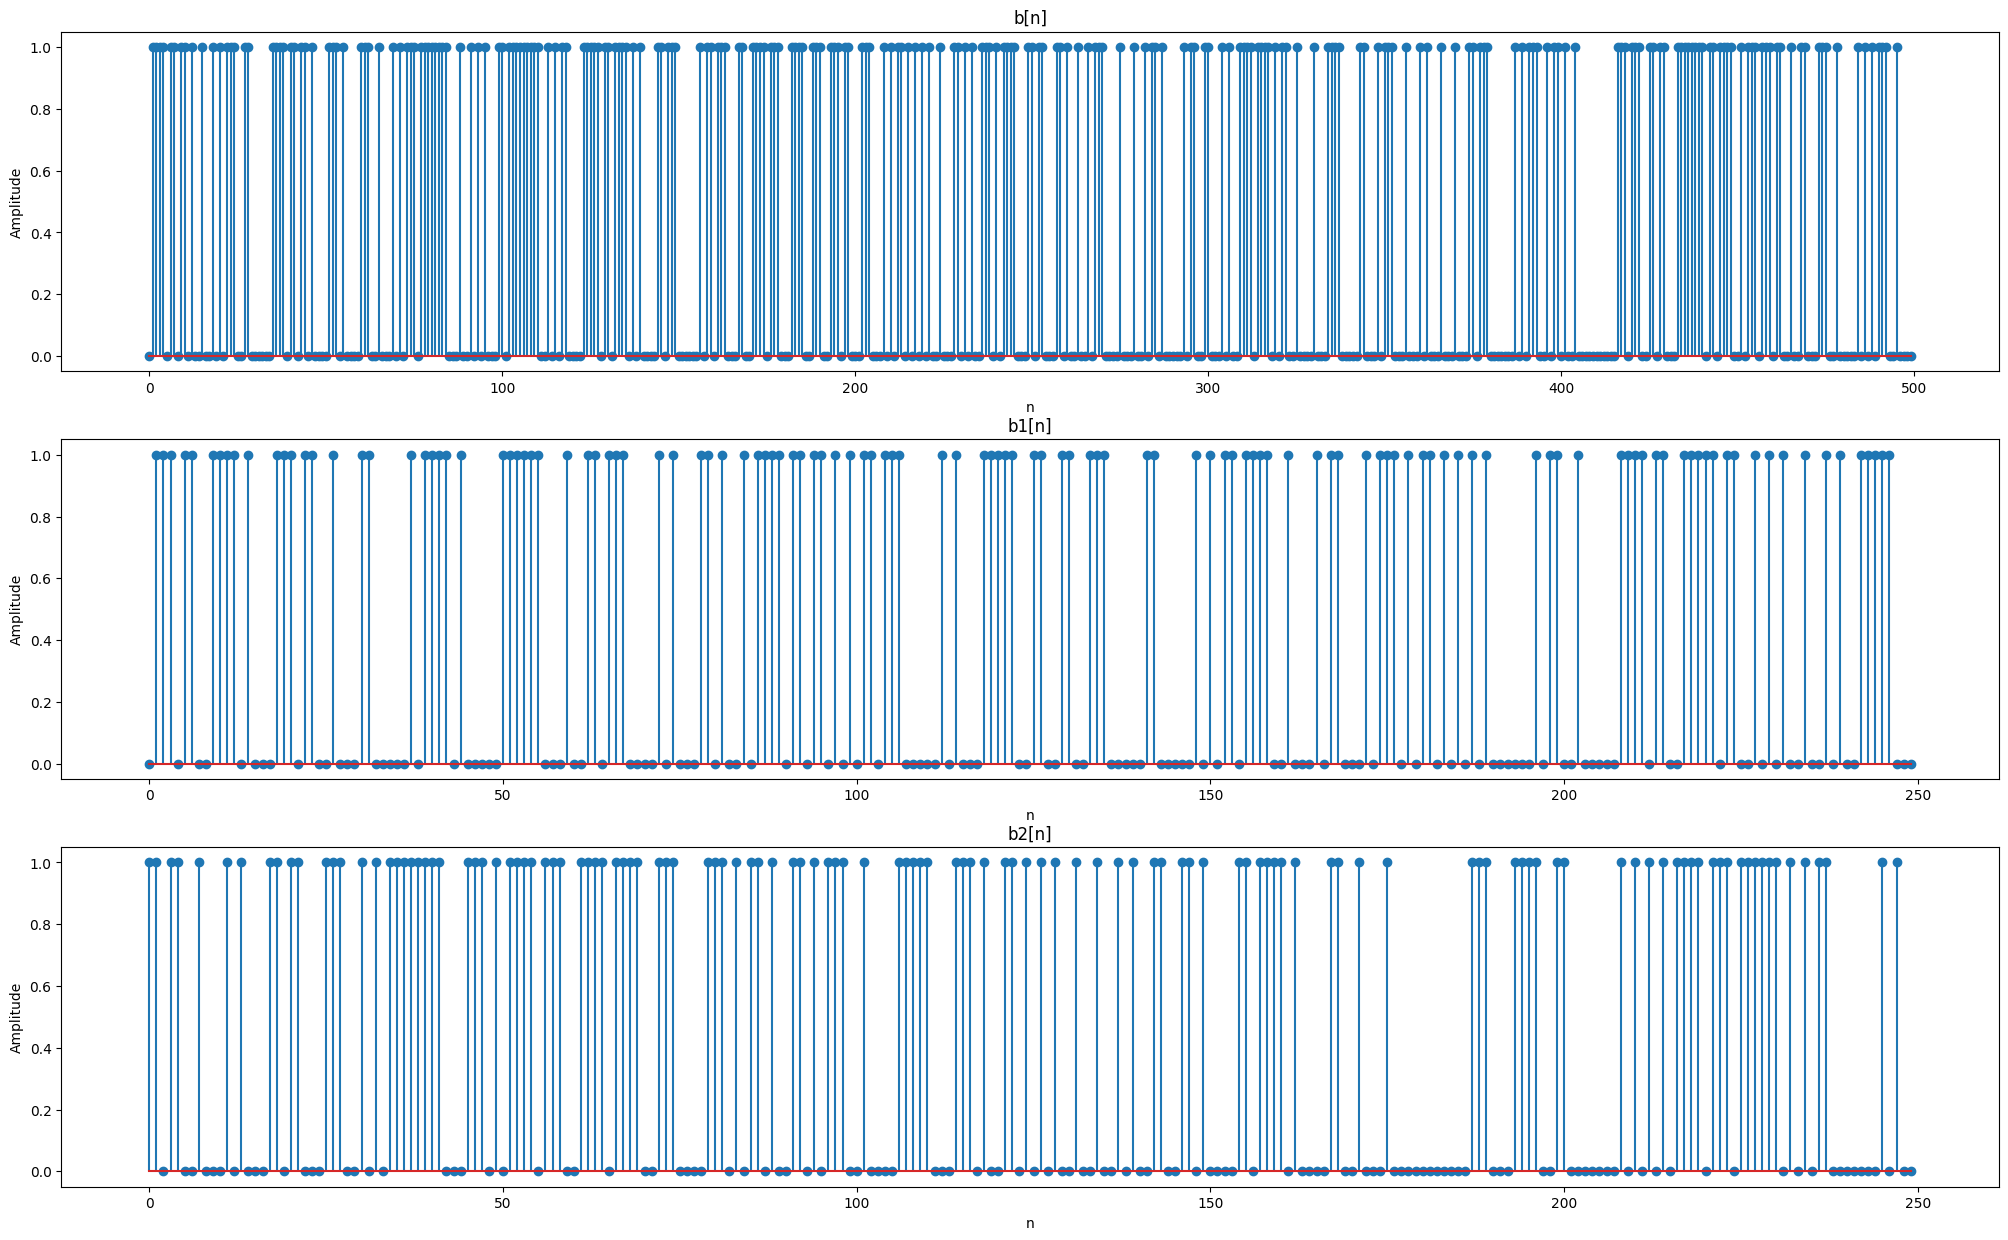

In [17]:
def pam_pulse_one(duration, sampling_freq):
    t = np.arange(0, duration, 1 / sampling_freq)
    pulse = np.ones_like(t)
    return  pulse

def pam_pulse_zero(duration, sampling_freq):
    t = np.arange(0, duration, 1 / sampling_freq)
    pulse = -np.ones_like(t)
    return pulse

n = 500
duration = 1e-2 
fs = 1e6  
fc = 10e3
bw = 1e3

t1 = np.arange(0, duration*n/2, 1 / fs)
t = np.arange(0, duration*n, 1 / fs)

sequence = np.random.randint(2, size=n)

plt.figure(figsize=(25, 15))


b1, b2 = divider(sequence)

plt.subplot(3,1,1)
plt.stem(sequence)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b[n]')

plt.subplot(3,1,2)
plt.stem(b1)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b1[n]')

plt.subplot(3,1,3)
plt.stem(b2)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b2[n]')



Text(0.5, 1.0, 'xc(t)')

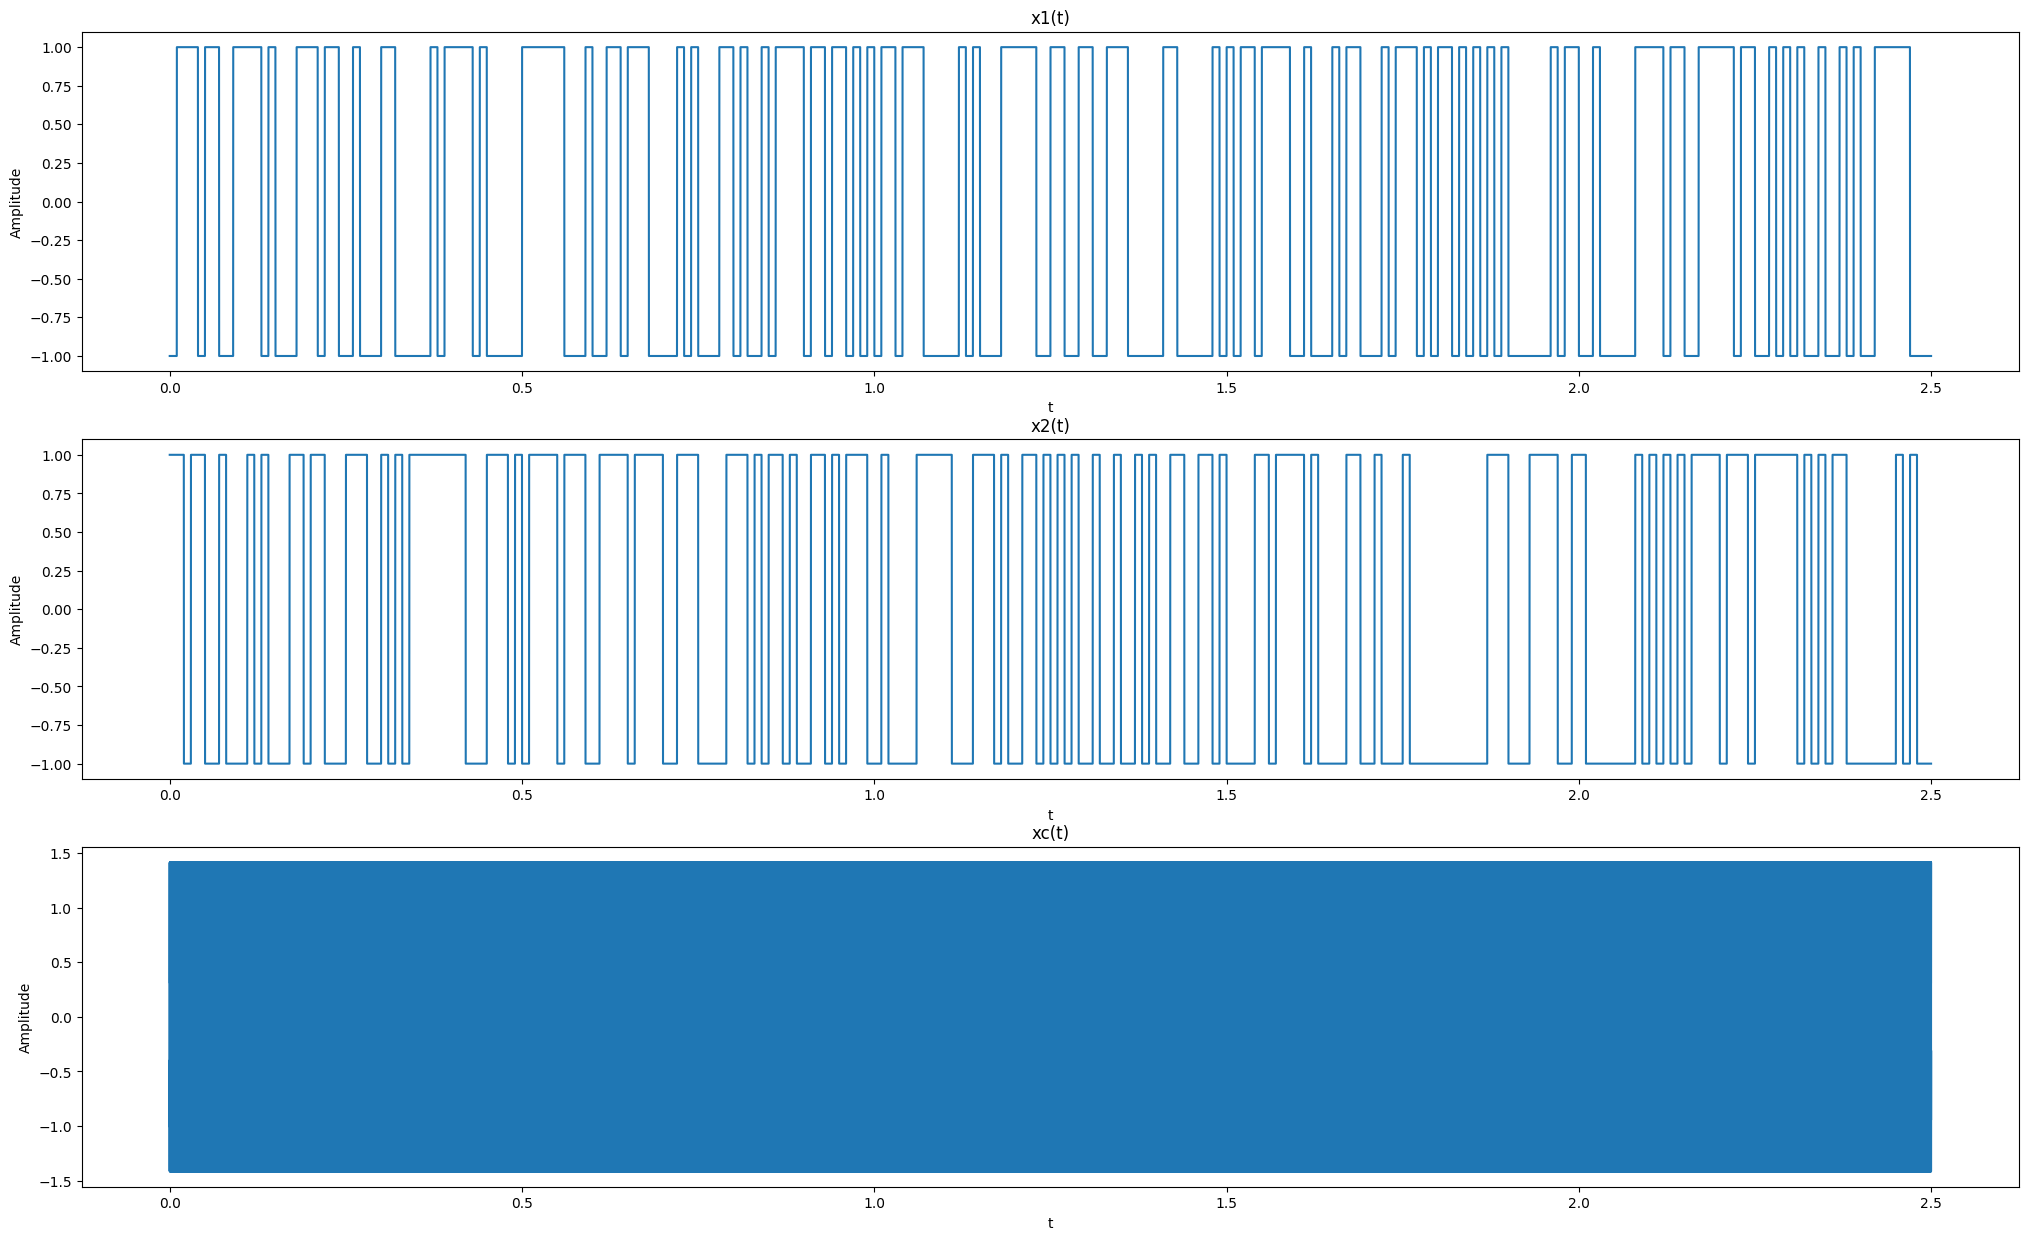

In [18]:
pam_pulse_one = pam_pulse_one(duration, fs)
pam_pulse_zero = pam_pulse_zero(duration, fs)

x1 = pulseShaping(b1, pam_pulse_zero, pam_pulse_one)
x2 = pulseShaping(b2, pam_pulse_zero, pam_pulse_one)

modulated_signal = analogMod(x1,x2,fc,fs)


plt.figure(figsize=(25, 15))

plt.subplot(3,1,1)
plt.plot(t1,x1)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x1(t)')

plt.subplot(3,1,2)
plt.plot(t1,x2)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x2(t)')


plt.subplot(3,1,3)
plt.plot(t1,modulated_signal)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('xc(t)')


Text(0.5, 1.0, 'part of xc(t)')

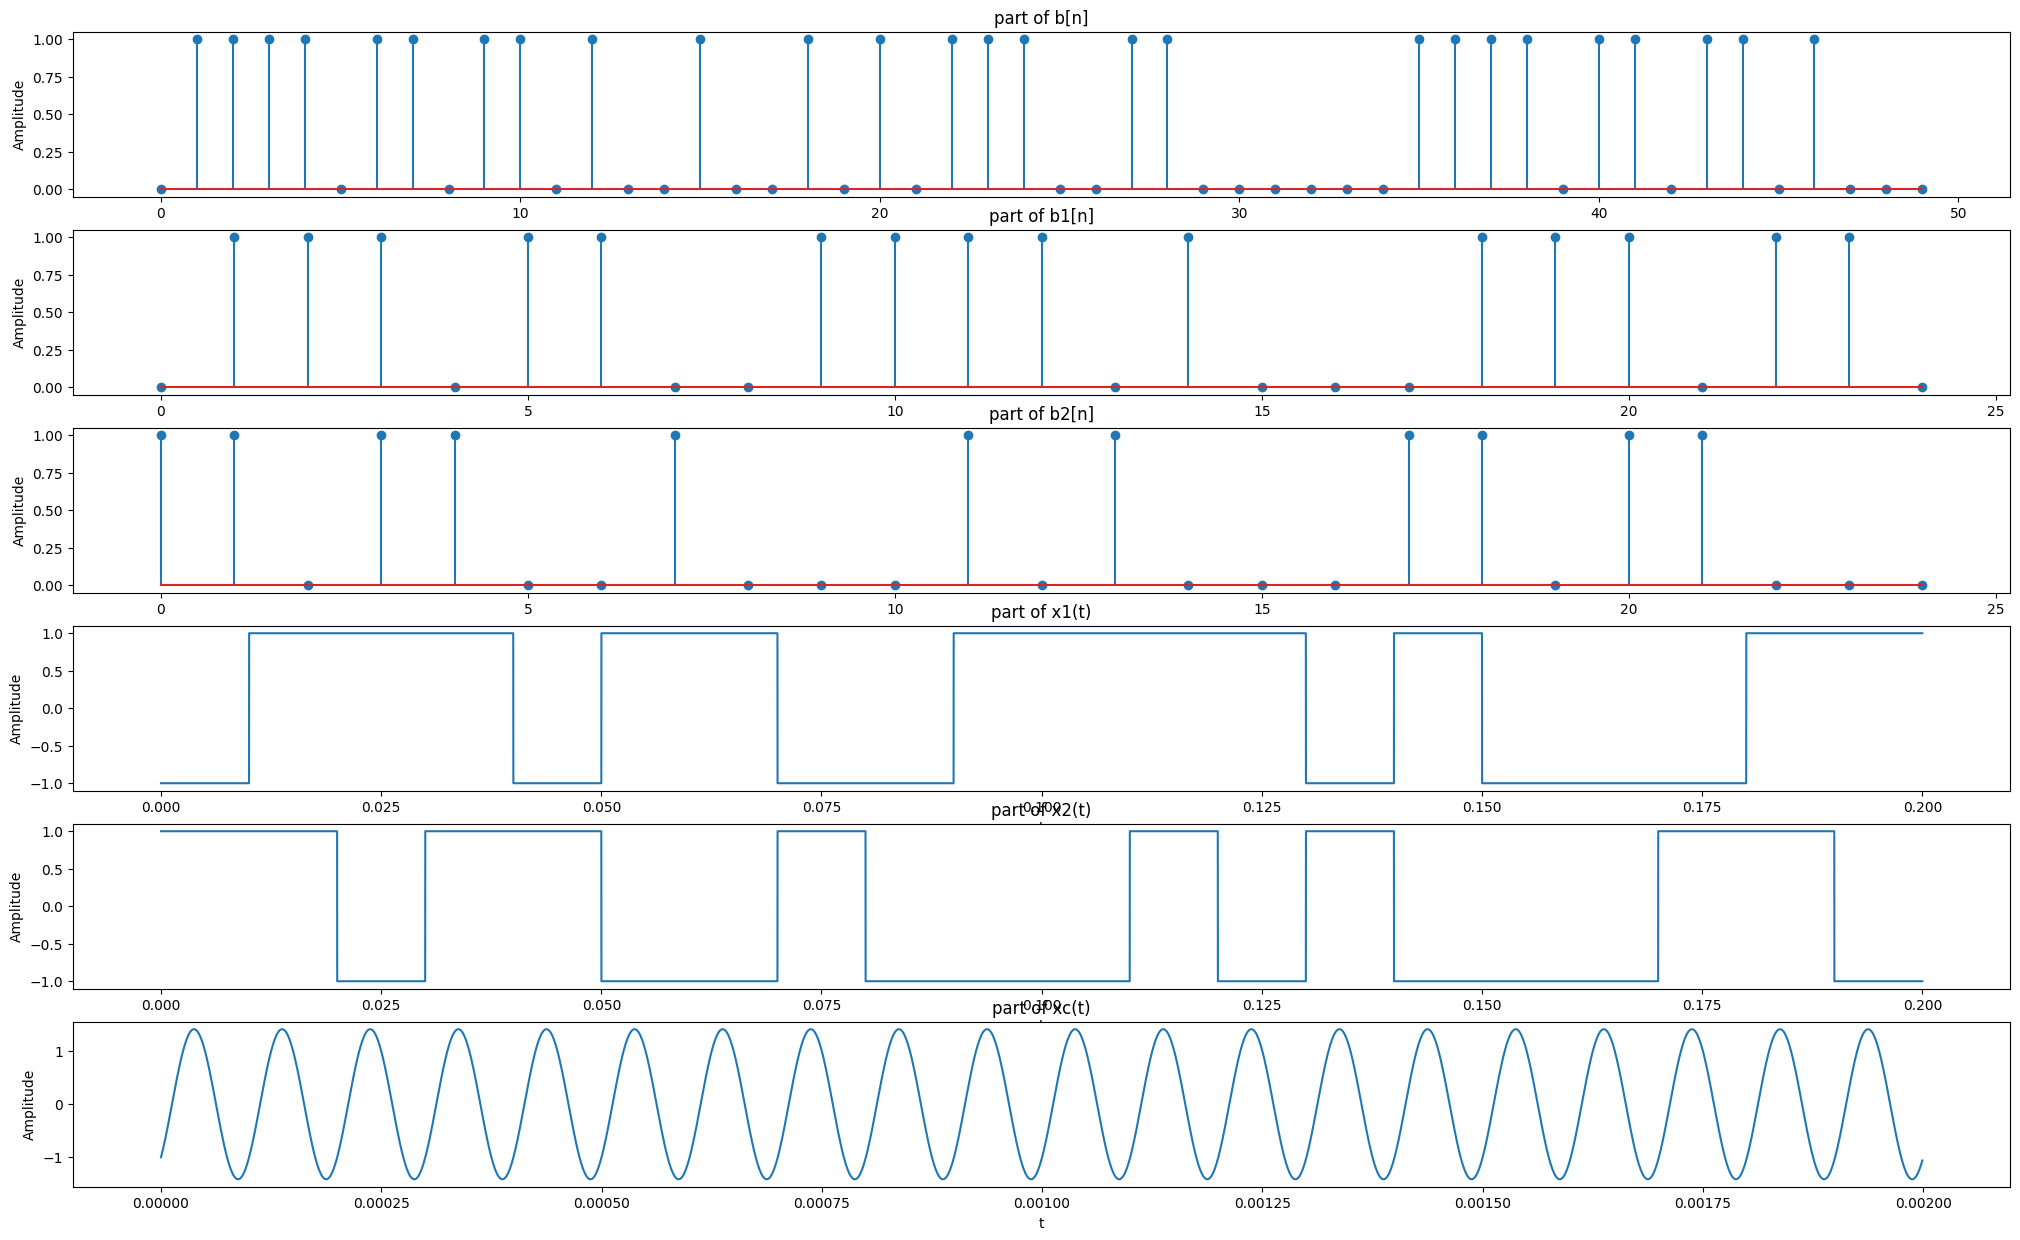

In [19]:
x1 = pulseShaping(b1, pam_pulse_zero, pam_pulse_one)
x2 = pulseShaping(b2, pam_pulse_zero, pam_pulse_one)
t_end = 200_000
modulated_signal = analogMod(x1,x2,fc,fs)

plt.figure(figsize=(25, 15))

plt.subplot(6,1,1)
plt.stem(sequence[0:50])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('part of b[n]')

plt.subplot(6,1,2)
plt.stem(b1[0:25])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('part of b1[n]')


plt.subplot(6,1,3)
plt.stem(b2[0:25])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('part of b2[n]')


plt.subplot(6,1,4)
plt.plot(t1[0:t_end],x1[0:t_end])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('part of x1(t)')

plt.subplot(6,1,5)
plt.plot(t1[0:t_end],x2[0:t_end])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('part of x2(t)')

plt.subplot(6,1,6)
plt.plot(t1[0:2000],modulated_signal[0:2000])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('part of xc(t)')


Parameters and Initialization:

n = 500: Total number of bits transmitted.
duration = 1e-2: Duration of the signal.
fs = 1e6: Sampling frequency.
fc = 10e3: Carrier frequency.
bw = 1e3: Bandwidth of the channel.

Bandpass Channel Simulation:

bandpass_signal = channel(modulated_signal, fc, fs, bw): The modulated signal is passed through a bandpass channel using the channel function.

Error Calculation Function:

calculate_error(variance, bandpass_signal): This function adds Gaussian noise to the bandpass signal, demodulates it, performs matched filtering, and compares the estimated bits with the original sequence to calculate the bit error rate.

Estimated Bits Function:

get_estimated(variance, bandpass_signal): Similar to the error calculation function but returns the estimated bits without calculating the error.

Simulating and Plotting:

estimated_bits1, estimated_bits2 = get_estimated(100, bandpass_signal): Simulates the system with a specific variance (noise level) and obtains the estimated bits.
variance_vals = np.linspace(1, 100000, 10): Generates an array of variance values for simulation.
error_values = [calculate_error(variance, bandpass_signal) / n for variance in variance_vals]: Simulates the system for different variance values and calculates the bit error rate for each.
The results are then plotted to visualize the impact of noise on the system's performance.

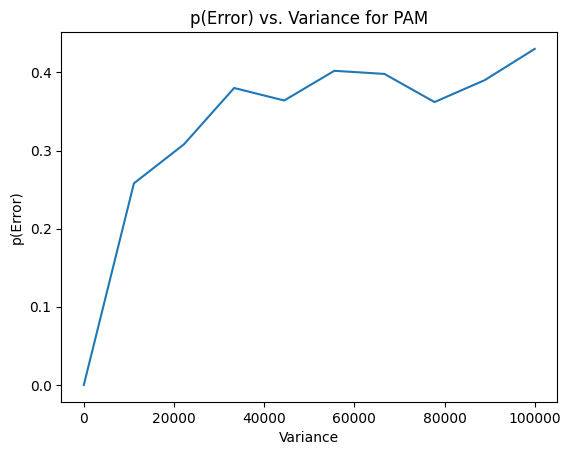

In [20]:
n = 500
duration = 1e-2 
fs = 1e6  
fc = 10e3
bw = 1e3


bandpass_signal=channel(modulated_signal,fc,fs,bw)
def calculate_error(variance,bandpass_signal):
    w = variance
    noise = np.random.normal(loc=0, scale=np.sqrt(w), size=len(bandpass_signal))
    noised_signal=bandpass_signal+noise
    demodulated_signal_1, demodulated_signal_2 = analogDemod(noised_signal,fs,bw,fc)
    _, _, estimated_bits1 = matchedFilt(demodulated_signal_1, pam_pulse_zero, pam_pulse_one, n)
    _, _, estimated_bits2 = matchedFilt(demodulated_signal_2, pam_pulse_zero, pam_pulse_one, n)
    
    estimated_bits = []
    for i in range(len(estimated_bits1)):
        estimated_bits.append(estimated_bits1[i])
        estimated_bits.append(estimated_bits2[i])        
    
    error = np.sum(estimated_bits != sequence)
    return error

def get_estimated(variance,bandpass_signal):
    w = variance
    noise = np.random.normal(loc=0, scale=np.sqrt(w), size=len(bandpass_signal))
    noised_signal=bandpass_signal+noise
    demodulated_signal_1, demodulated_signal_2 = analogDemod(noised_signal,fs,bw,fc)
    _, _, estimated_bits1 = matchedFilt(demodulated_signal_1, pam_pulse_zero, pam_pulse_one, n)
    _, _, estimated_bits2 = matchedFilt(demodulated_signal_2, pam_pulse_zero, pam_pulse_one, n)
    return estimated_bits1, estimated_bits2
    

estimated_bits1, estimated_bits2 = get_estimated(100,bandpass_signal)

variance_vals = np.linspace(1, 100000, 10)  
error_values = [calculate_error(variance,bandpass_signal)/n for variance in variance_vals]
plt.plot(variance_vals, error_values)
plt.xlabel('Variance')
plt.ylabel('p(Error)')
plt.title('p(Error) vs. Variance for PAM')
plt.show()

# Note that the plot of "P(Error) vs. Variance" shows how the bit error rate (P(Error)) changes as the variance of the added noise increases. The assumption here is that the higher the variance, the noisier the communication channel.

The reason the P(Error) vs. Variance plot tends to be an ascending function (increasing as variance increases) can be explained by the impact of noise on the communication system:

Increased Noise Levels: As the variance of the added noise increases, the amplitude and randomness of the noise in the communication channel also increase. Higher noise levels can lead to a greater likelihood of errors in the received signal.

Demodulation Challenges: In the demodulation process, higher levels of noise can make it more challenging to accurately recover the transmitted signal. The presence of noise can cause fluctuations in the received signal, leading to errors in estimating the original transmitted bits.

Matched Filtering Sensitivity: The system in the provided code uses matched filtering for demodulation. Matched filtering is sensitive to variations in the received signal. Increased noise levels can affect the signal-to-noise ratio, making it more difficult for the matched filter to distinguish between different transmitted symbols.

Probability of Error: The bit error rate (P(Error)) is a measure of the probability that a received bit is incorrectly decoded. As the noise level increases, the probability of errors in the received signal also increases, leading to a higher bit error rate.

Signal-to-Noise Ratio (SNR): The relationship between the signal power and the noise power (expressed as SNR) becomes less favorable with higher noise levels. In a noisy environment, the signal may be overwhelmed by noise, making it more challenging to recover the original information accurately.


This code generates a 2D scatter plot comparing the estimated bits (b1^, b2^) with the original bits (b1, b2) in a PAM (Pulse Amplitude Modulation) system for different levels of noise variance. Here's a breakdown of the code:

Variable Initialization:

variance_vals = np.array([0.1, 1, 5, 10, 100, 500]): Array of different noise variance values.

Scatter Plot Loop:

Loop through each variance value and create a subplot for each.
Generate a noisy signal by adding Gaussian noise to the bandpass signal.
Demodulate the noisy signal.
Perform matched filtering and estimate the bits.
Normalize the estimated bits by dividing by E_0 and shifting by 0.5.
Plot the scatter plot comparing (b1^, b2^) with (b1, b2).

Plotting:

Use plt.scatter to plot the estimated bits ((b1^, b2^)) and the original bits ((b1, b2)).
Each subplot represents a different noise variance level.

C:\Users\Matin\AppData\Local\Temp\ipykernel_13468\2255359294.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  estimated_bits1_s[jj] = k / E_0 + 0.5
C:\Users\Matin\AppData\Local\Temp\ipykernel_13468\2255359294.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  estimated_bits2_s[jj] = k / E_0 + 0.5


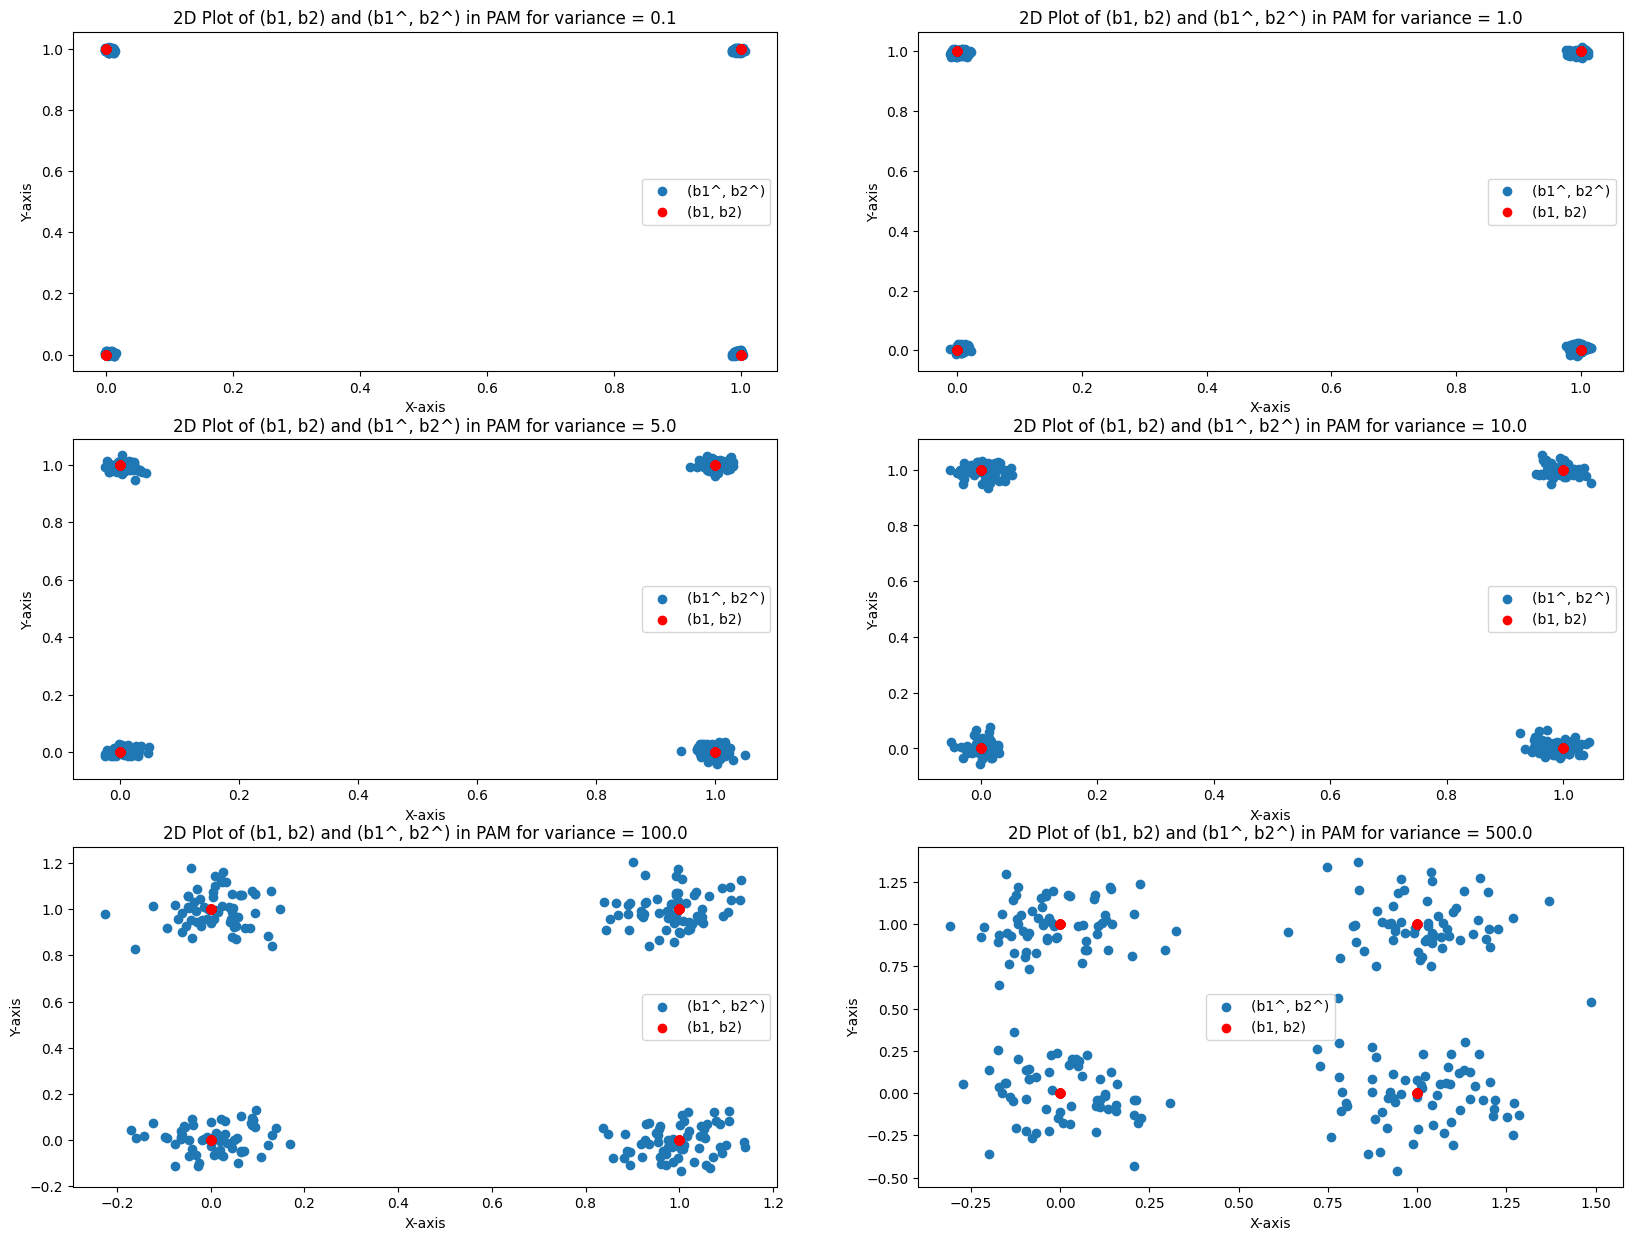

In [51]:
variance_vals = np.array([0.1, 1, 5, 10, 100, 500])
i = 1
plt.figure(figsize=(20, 15))

for variance in variance_vals:
    noise = np.random.normal(loc=0, scale=np.sqrt(variance), size=len(bandpass_signal))
    noised_signal = bandpass_signal + noise
    demodulated_signal_1, demodulated_signal_2 = analogDemod(noised_signal, fs, bw, fc)
    
    
    output_matched_0_1, output_matched_1_1, estimated_bits1 = matchedFilt(demodulated_signal_1, pam_pulse_zero, pam_pulse_one, n)
    E_0 = np.sum(np.abs(pam_pulse_one)**2)  # Compute E_0 using NumPy sum
    jj = 0
    estimated_bits1_s = np.zeros(len(estimated_bits1))
    for k in output_matched_1_1[int(len(pam_pulse_zero))-1::int(len(pam_pulse_zero))]:
        estimated_bits1_s[jj] = k / E_0 + 0.5
        jj += 1

    jj = 0
    estimated_bits2_s = np.zeros(len(estimated_bits2))
    output_matched_0_2, output_matched_1_2, estimated_bits2 = matchedFilt(demodulated_signal_2, pam_pulse_zero, pam_pulse_one, n)
    for k in output_matched_1_2[int(len(pam_pulse_one))-1::int(len(pam_pulse_one))]:
        estimated_bits2_s[jj] = k / E_0 + 0.5
        jj += 1

    a_points = list(zip(estimated_bits1_s, estimated_bits2_s))
    b_points = list(zip(b1, b2))
    a_x, a_y = zip(*a_points)
    b_x, b_y = zip(*b_points)

    plt.subplot(3, 2, i)
    i = i + 1
    plt.scatter(a_x, a_y, label='(b1^, b2^)')
    plt.scatter(b_x, b_y, label='(b1, b2)', color="red")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('2D Plot of (b1, b2) and (b1^, b2^) in PAM for variance = ' + str(variance))
    plt.legend()

plt.show()


# 3.2:

We apply the same procedure on PSK modulation:

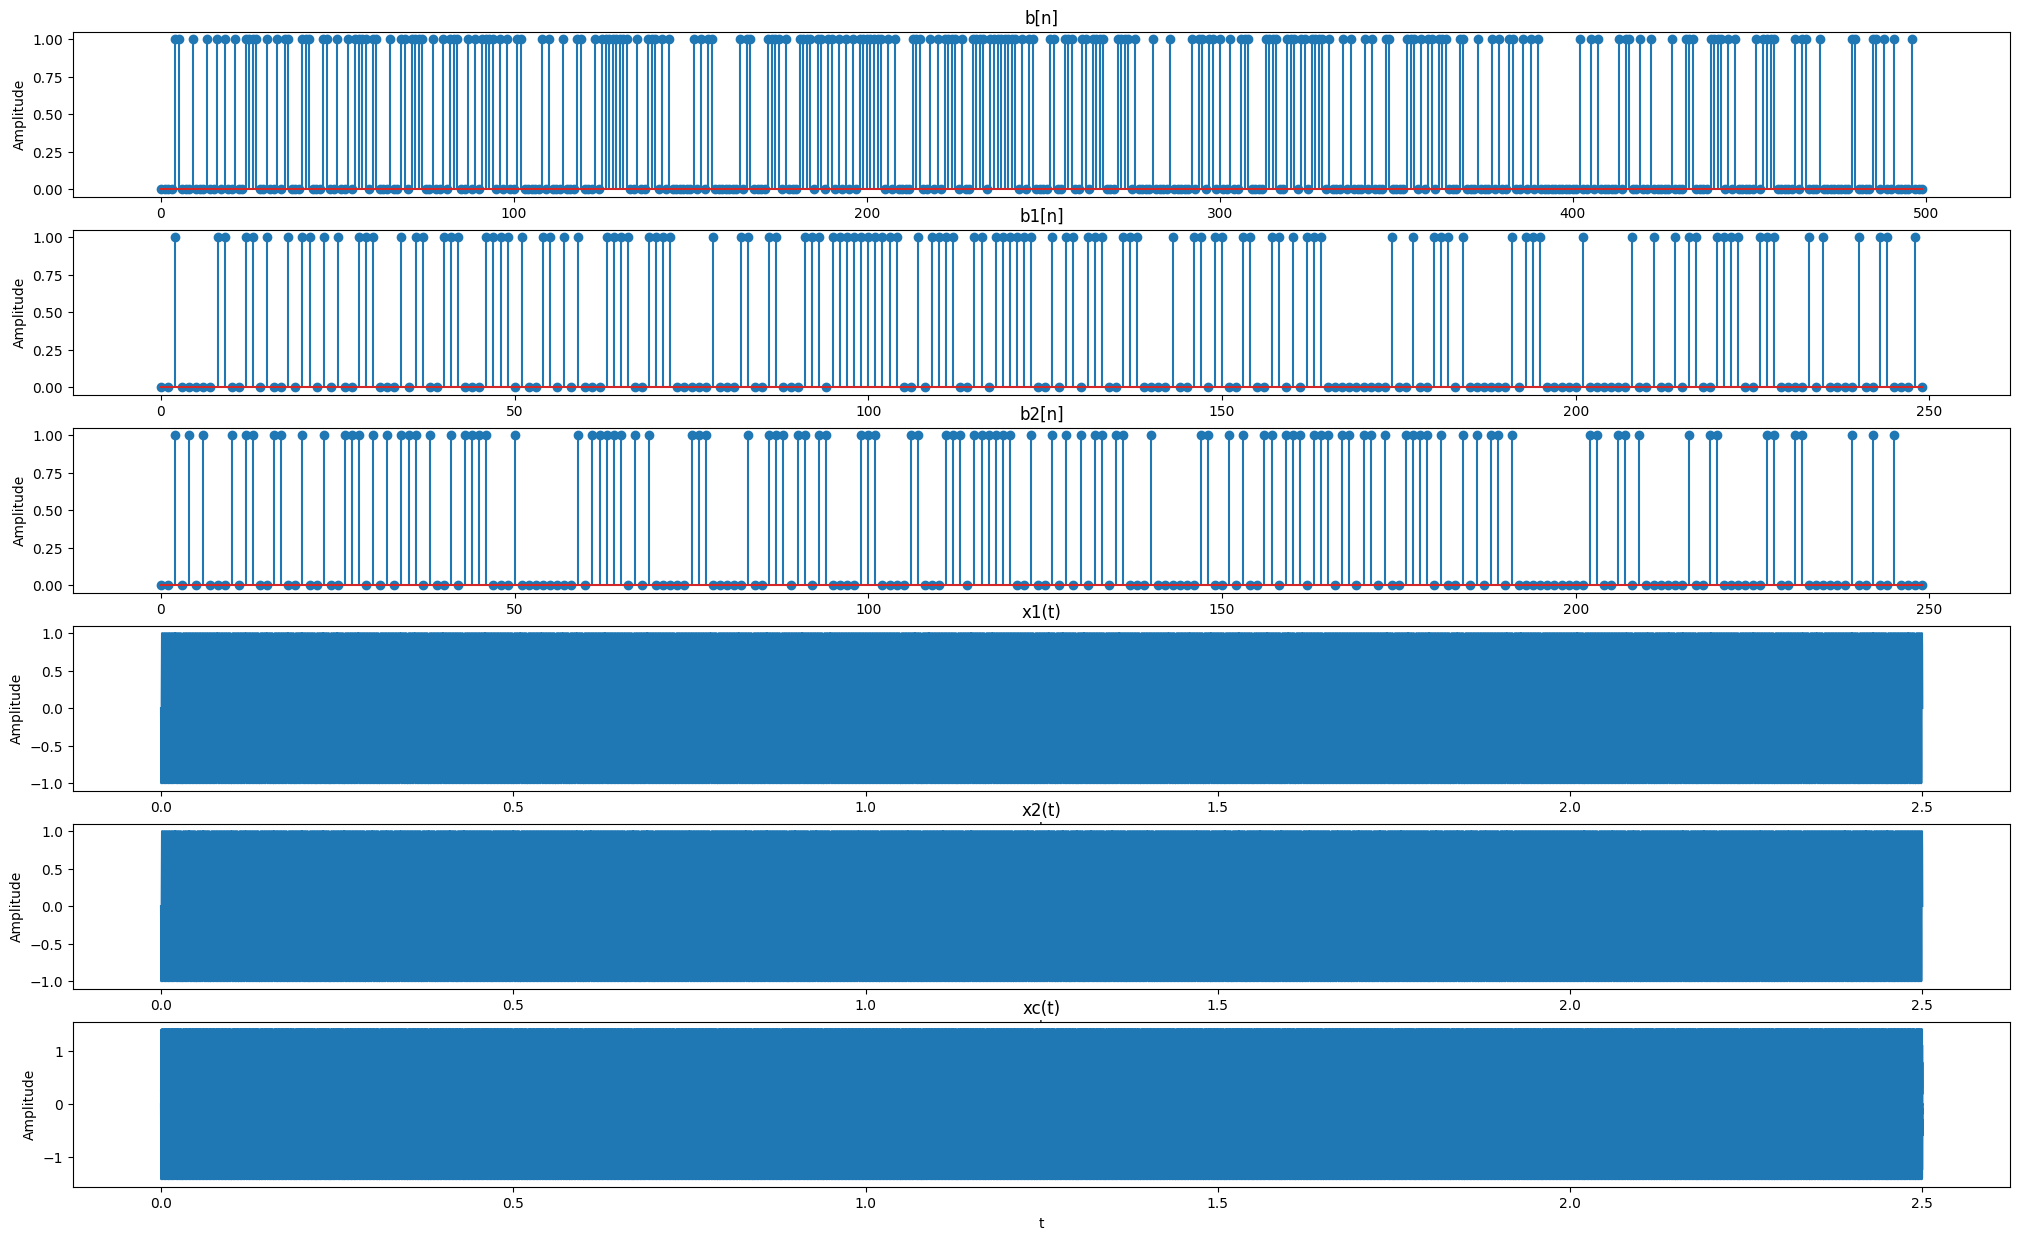

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [22]:
def psk_pulse_one(duration, sampling_freq):
    t = np.arange(0, duration, 1 / sampling_freq)
    pulse = np.ones_like(t)*np.sin(2*np.pi*500*t)
    return pulse

def psk_pulse_zero(duration, sampling_freq):
    t = np.arange(0, duration, 1 / sampling_freq)
    pulse = -np.ones_like(t)*np.sin(2*np.pi*500*t)
    return pulse

psk_pulse_one = psk_pulse_one(duration, fs)
psk_pulse_zero = psk_pulse_zero(duration, fs)

psk_b = np.random.randint(2, size=n)
psk_b1, psk_b2 = divider(psk_b)
psk_x1 = pulseShaping(psk_b1, psk_pulse_zero, psk_pulse_one)
psk_x2 = pulseShaping(psk_b2, psk_pulse_zero, psk_pulse_one)

t1 = np.arange(0, duration*n/2, 1 / fs)
t = np.arange(0, duration*n, 1 / fs)

plt.figure(figsize=(25, 15))

plt.subplot(6,1,1)
plt.stem(psk_b)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b[n]')

plt.subplot(6,1,2)
plt.stem(psk_b1)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b1[n]')

plt.subplot(6,1,3)
plt.stem(psk_b2)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b2[n]')

plt.subplot(6,1,4)
plt.plot(t1,psk_x1)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x1(t)')

plt.subplot(6,1,5)
plt.plot(t1,psk_x2)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x2(t)')

plt.subplot(6,1,6)
psk_xc = analogMod(psk_x1,psk_x2,fc,fs)
plt.plot(t1,psk_xc)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('xc(t)')
plt.show()
plt.figure()

Text(0.5, 1.0, 'part of xc(t)')

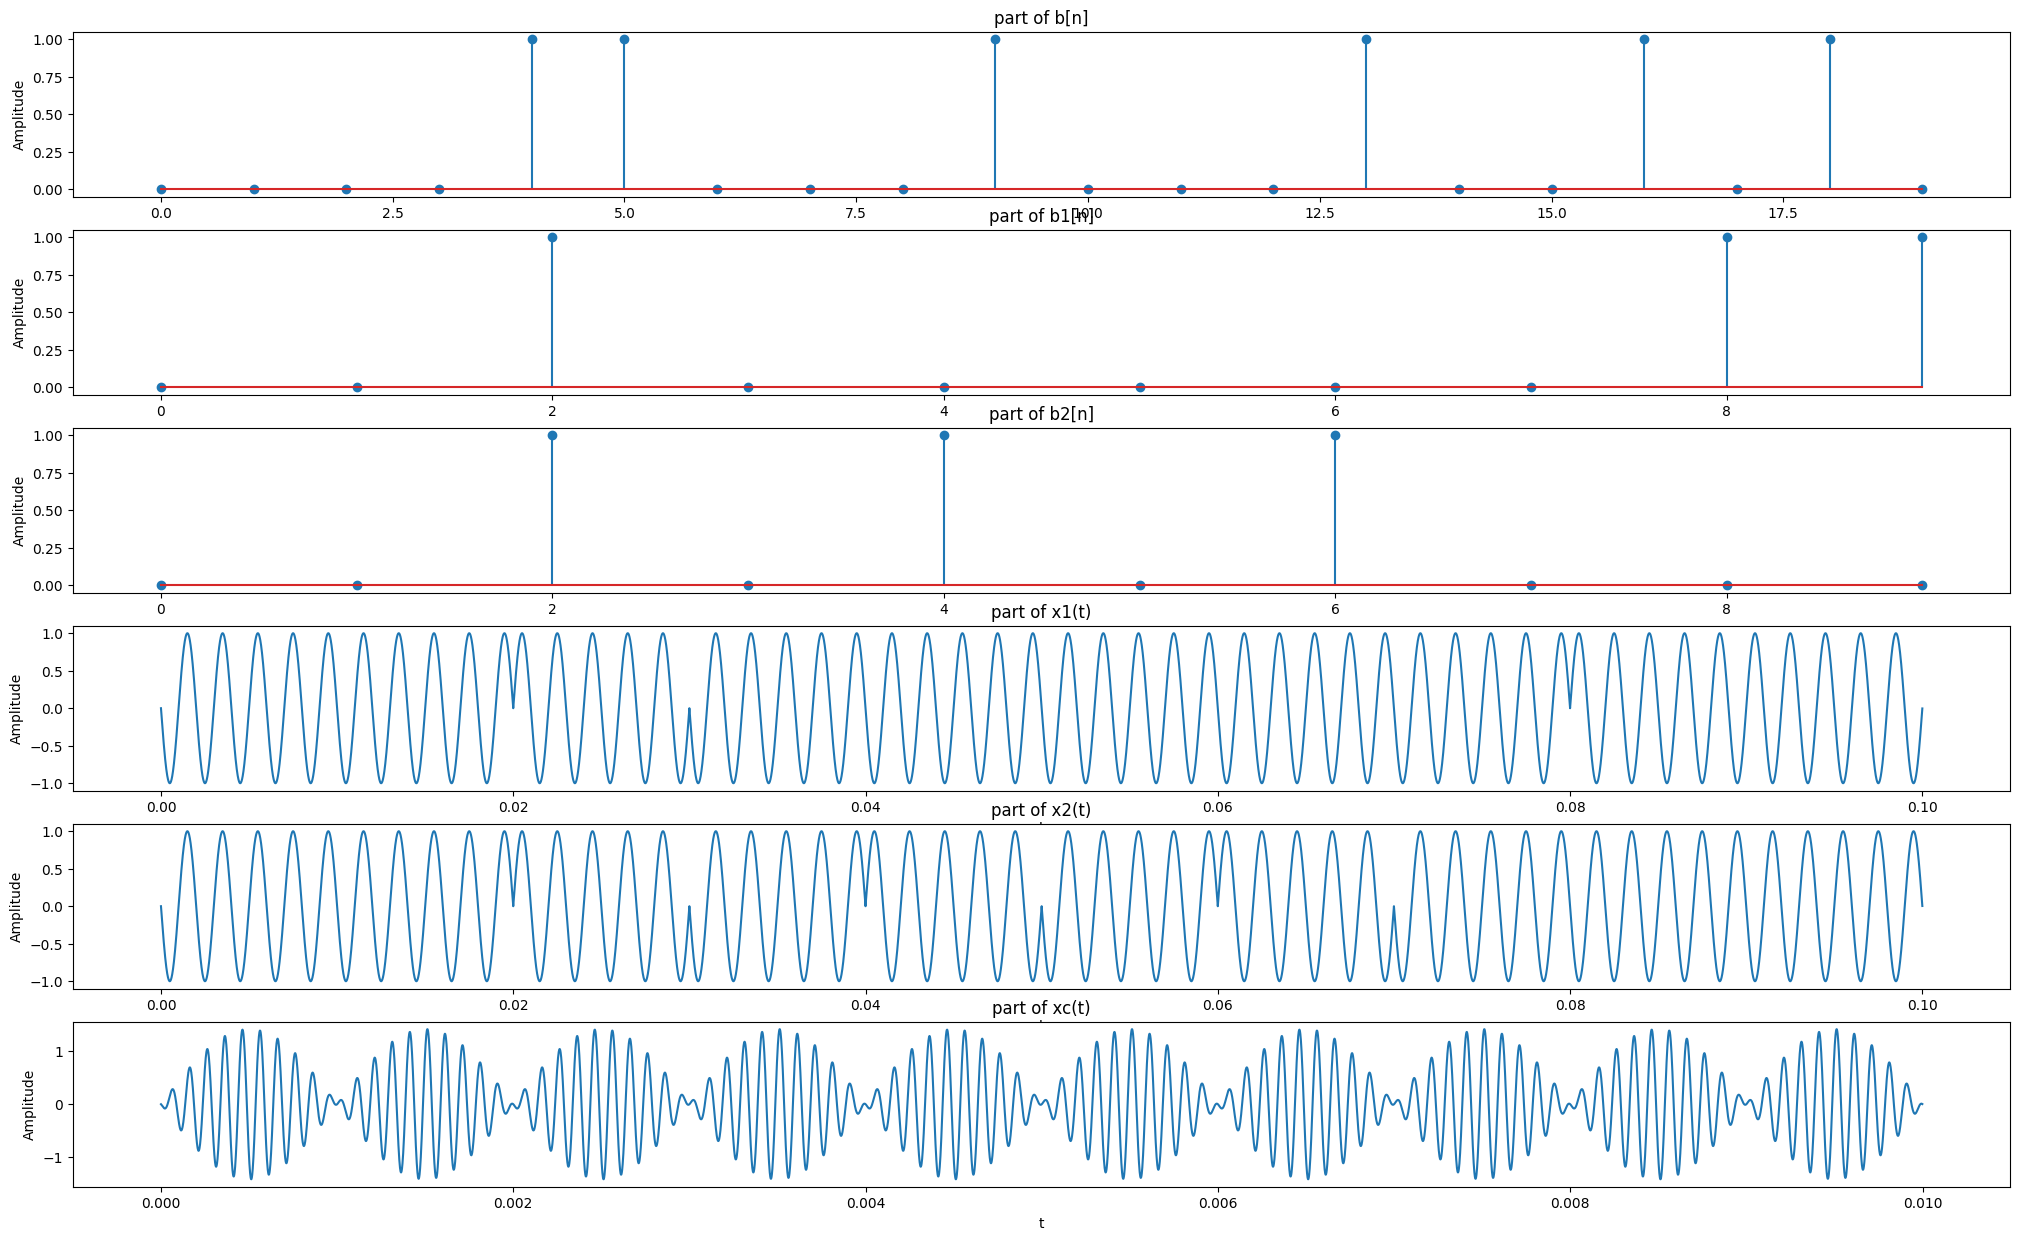

In [23]:
t1 = np.arange(0, duration*n/2, 1 / fs)
t = np.arange(0, duration*n, 1 / fs)

psk_x1 = pulseShaping(psk_b1, psk_pulse_zero, psk_pulse_one)
psk_x2 = pulseShaping(psk_b2, psk_pulse_zero, psk_pulse_one)
psk_xc = analogMod(psk_x1,psk_x2,fc,fs)

plt.figure(figsize=(25, 15))

plt.subplot(6,1,1)

plt.stem(psk_b[0:20])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('part of b[n]')

plt.subplot(6,1,2)
plt.stem(psk_b1[0:10])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('part of b1[n]')

plt.subplot(6,1,3)
plt.stem(psk_b2[0:10])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('part of b2[n]')

plt.subplot(6,1,4)
plt.plot(t1[0:100000],psk_x1[0:100000])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('part of x1(t)')

plt.subplot(6,1,5)
plt.plot(t1[0:100000],psk_x2[0:100000])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('part of x2(t)')

plt.subplot(6,1,6)
plt.plot(t1[0:10000],psk_xc[0:10000])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('part of xc(t)')


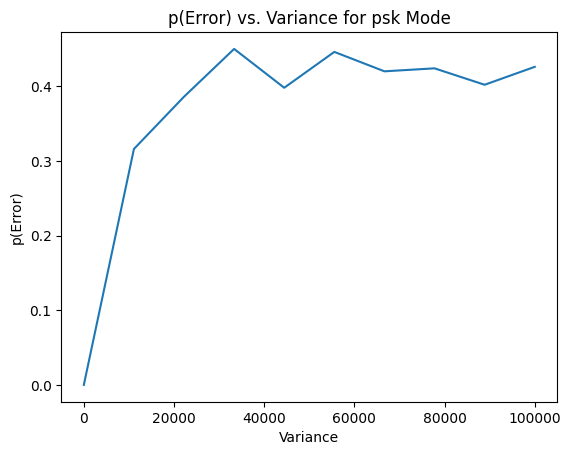

In [24]:
psk_bandpass_signal=channel(psk_xc,fc,fs,bw)

def simulate_and_calculate_error(variance,Bandpass_signal):
    w = variance
    noise = np.random.normal(loc=0, scale=np.sqrt(w), size=len(bandpass_signal))
    noised_signal=Bandpass_signal+noise
    psk_demodulated_signal_1, psk_demodulated_signal_2=analogDemod(noised_signal,fs,bw,fc)
    _, _, psk_estimated_bits1 = matchedFilt(psk_demodulated_signal_1, psk_pulse_zero, psk_pulse_one,n)
    _, _, psk_estimated_bits2 = matchedFilt(psk_demodulated_signal_2, psk_pulse_zero, psk_pulse_one,n)

    psk_estimated_bits = []
    for i in range(len(estimated_bits1)):
        psk_estimated_bits.append(psk_estimated_bits1[i])
        psk_estimated_bits.append(psk_estimated_bits2[i])
        
    error = np.sum(psk_estimated_bits != psk_b)
    return error


def get_estimated(variance,bandpass_signal):
    w = variance
    noise = np.random.normal(loc=0, scale=np.sqrt(w), size=len(bandpass_signal))
    noised_signal=bandpass_signal+noise
    psk_demodulated_signal_1, psk_demodulated_signal_2 = analogDemod(noised_signal,fs,bw,fc)
    _, _, psk_estimated_bits1 = matchedFilt(psk_demodulated_signal_1, psk_pulse_zero, psk_pulse_one, n)
    _, _, psk_estimated_bits2 = matchedFilt(psk_demodulated_signal_2, psk_pulse_zero, psk_pulse_one, n)
    return psk_estimated_bits1, psk_estimated_bits2
    

psk_estimated_bits1, psk_estimated_bits2 = get_estimated(100,bandpass_signal)

variance_vals = np.linspace(0, 100000, 10)  
error_values = [simulate_and_calculate_error(variance,psk_bandpass_signal)/n for variance in variance_vals]
plt.plot(variance_vals, error_values)
plt.xlabel('Variance')
plt.ylabel('p(Error)')
plt.title('p(Error) vs. Variance for psk Mode')
plt.show()

The plot of "P(Error) vs. Variance" shows how the bit error rate (P(Error)) changes as the variance of the added noise increases. The assumption here is that the higher the variance, the noisier the communication channel.

The reason the P(Error) vs. Variance plot tends to be an ascending function (increasing as variance increases) can be explained by the impact of noise on the communication system:

Increased Noise Levels: As the variance of the added noise increases, the amplitude and randomness of the noise in the communication channel also increase. Higher noise levels can lead to a greater likelihood of errors in the received signal.

Demodulation Challenges: In the demodulation process, higher levels of noise can make it more challenging to accurately recover the transmitted signal. The presence of noise can cause fluctuations in the received signal, leading to errors in estimating the original transmitted bits.

Matched Filtering Sensitivity: The system in the provided code uses matched filtering for demodulation. Matched filtering is sensitive to variations in the received signal. Increased noise levels can affect the signal-to-noise ratio, making it more difficult for the matched filter to distinguish between different transmitted symbols.

Probability of Error: The bit error rate (P(Error)) is a measure of the probability that a received bit is incorrectly decoded. As the noise level increases, the probability of errors in the received signal also increases, leading to a higher bit error rate.

Signal-to-Noise Ratio (SNR): The relationship between the signal power and the noise power (expressed as SNR) becomes less favorable with higher noise levels. In a noisy environment, the signal may be overwhelmed by noise, making it more challenging to recover the original information accurately.

C:\Users\Matin\AppData\Local\Temp\ipykernel_13468\2257147859.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  psk_estimated_bits1_s[jj] = k / E_0 + 0.5
C:\Users\Matin\AppData\Local\Temp\ipykernel_13468\2257147859.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  psk_estimated_bits2_s[jj] = k / E_0 + 0.5


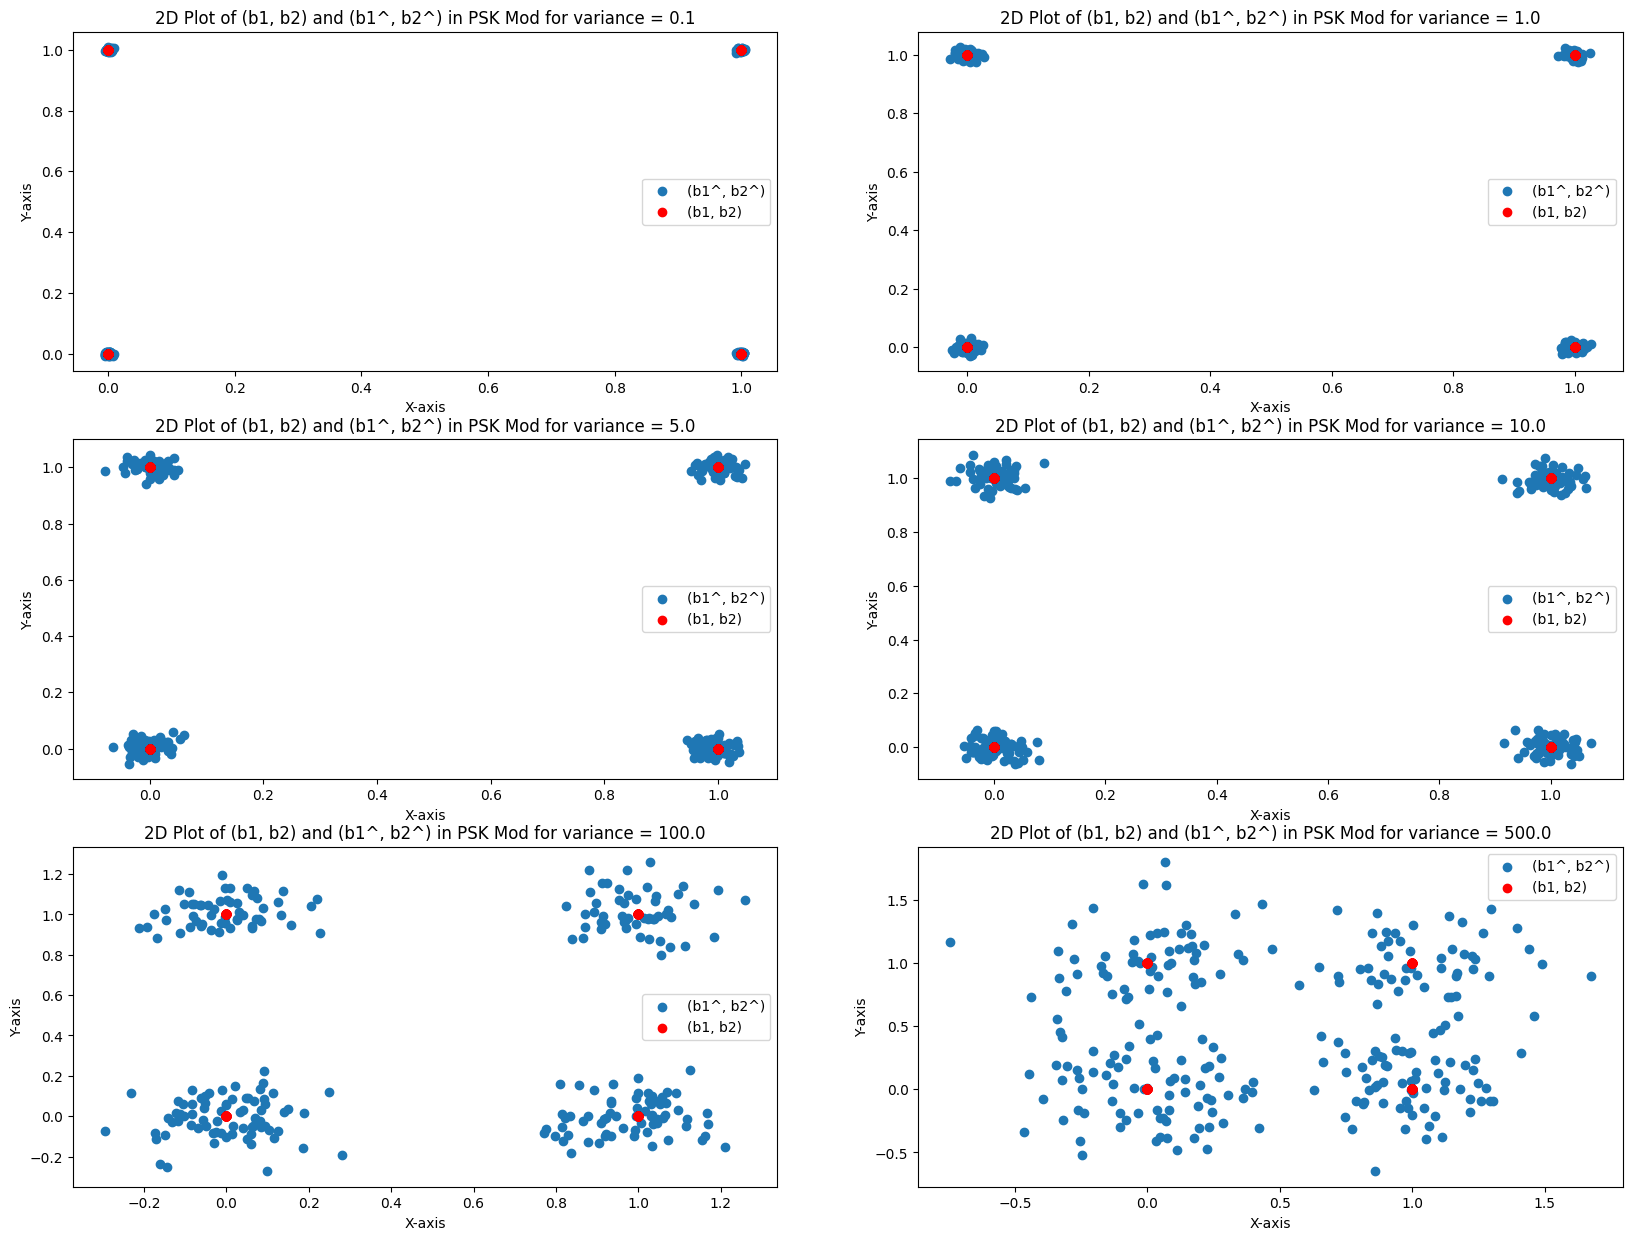

In [50]:
variance_vals = np.array([0.1, 1, 5, 10, 100, 500])
i = 1
plt.figure(figsize=(20, 15))


for variance in variance_vals:
    psk_noise = np.random.normal(loc=0, scale=np.sqrt(variance), size=len(psk_bandpass_signal))
    psk_noised_signal = psk_bandpass_signal + psk_noise
    psk_demodulated_signal_1, psk_demodulated_signal_2 = analogDemod(psk_noised_signal, fs, bw, fc)
    psk_output_matched_0_1, psk_output_matched_1_1, psk_estimated_bits1 = matchedFilt(psk_demodulated_signal_1, psk_pulse_zero, psk_pulse_one, n)
    E_0 = np.sum(np.abs(psk_pulse_one)**2)  # Compute E_0 using NumPy sum
    jj = 0
    psk_estimated_bits1_s = np.zeros(len(psk_estimated_bits1))
    for k in psk_output_matched_1_1[int(len(psk_pulse_zero))-1::int(len(psk_pulse_zero))]:
        psk_estimated_bits1_s[jj] = k / E_0 + 0.5
        jj += 1

    jj = 0
    psk_estimated_bits2_s = np.zeros(len(psk_estimated_bits2))
    psk_output_matched_0_2, psk_output_matched_1_2, psk_estimated_bits2 = matchedFilt(psk_demodulated_signal_2, psk_pulse_zero, psk_pulse_one, n)
    for k in psk_output_matched_1_2[int(len(psk_pulse_zero))-1::int(len(psk_pulse_zero))]:
        psk_estimated_bits2_s[jj] = k / E_0 + 0.5
        jj += 1

    psk_a_points = list(zip(psk_estimated_bits1_s, psk_estimated_bits2_s))
    psk_b_points = list(zip(psk_b1, psk_b2))
    psk_a_x, psk_a_y = zip(*psk_a_points)
    psk_b_x, psk_b_y = zip(*psk_b_points)

    plt.subplot(3, 2, i)
    i = i + 1
    plt.scatter(psk_a_x, psk_a_y, label='(b1^, b2^)')
    plt.scatter(psk_b_x, psk_b_y, label='(b1, b2)', color = "red")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('2D Plot of (b1, b2) and (b1^, b2^) in PSK Mod for variance = ' + str(variance))
    plt.legend()


plt.show()


# 3.3:


We apply the same procedure on PSK modulation:

Text(0.5, 1.0, 'xc(t)')

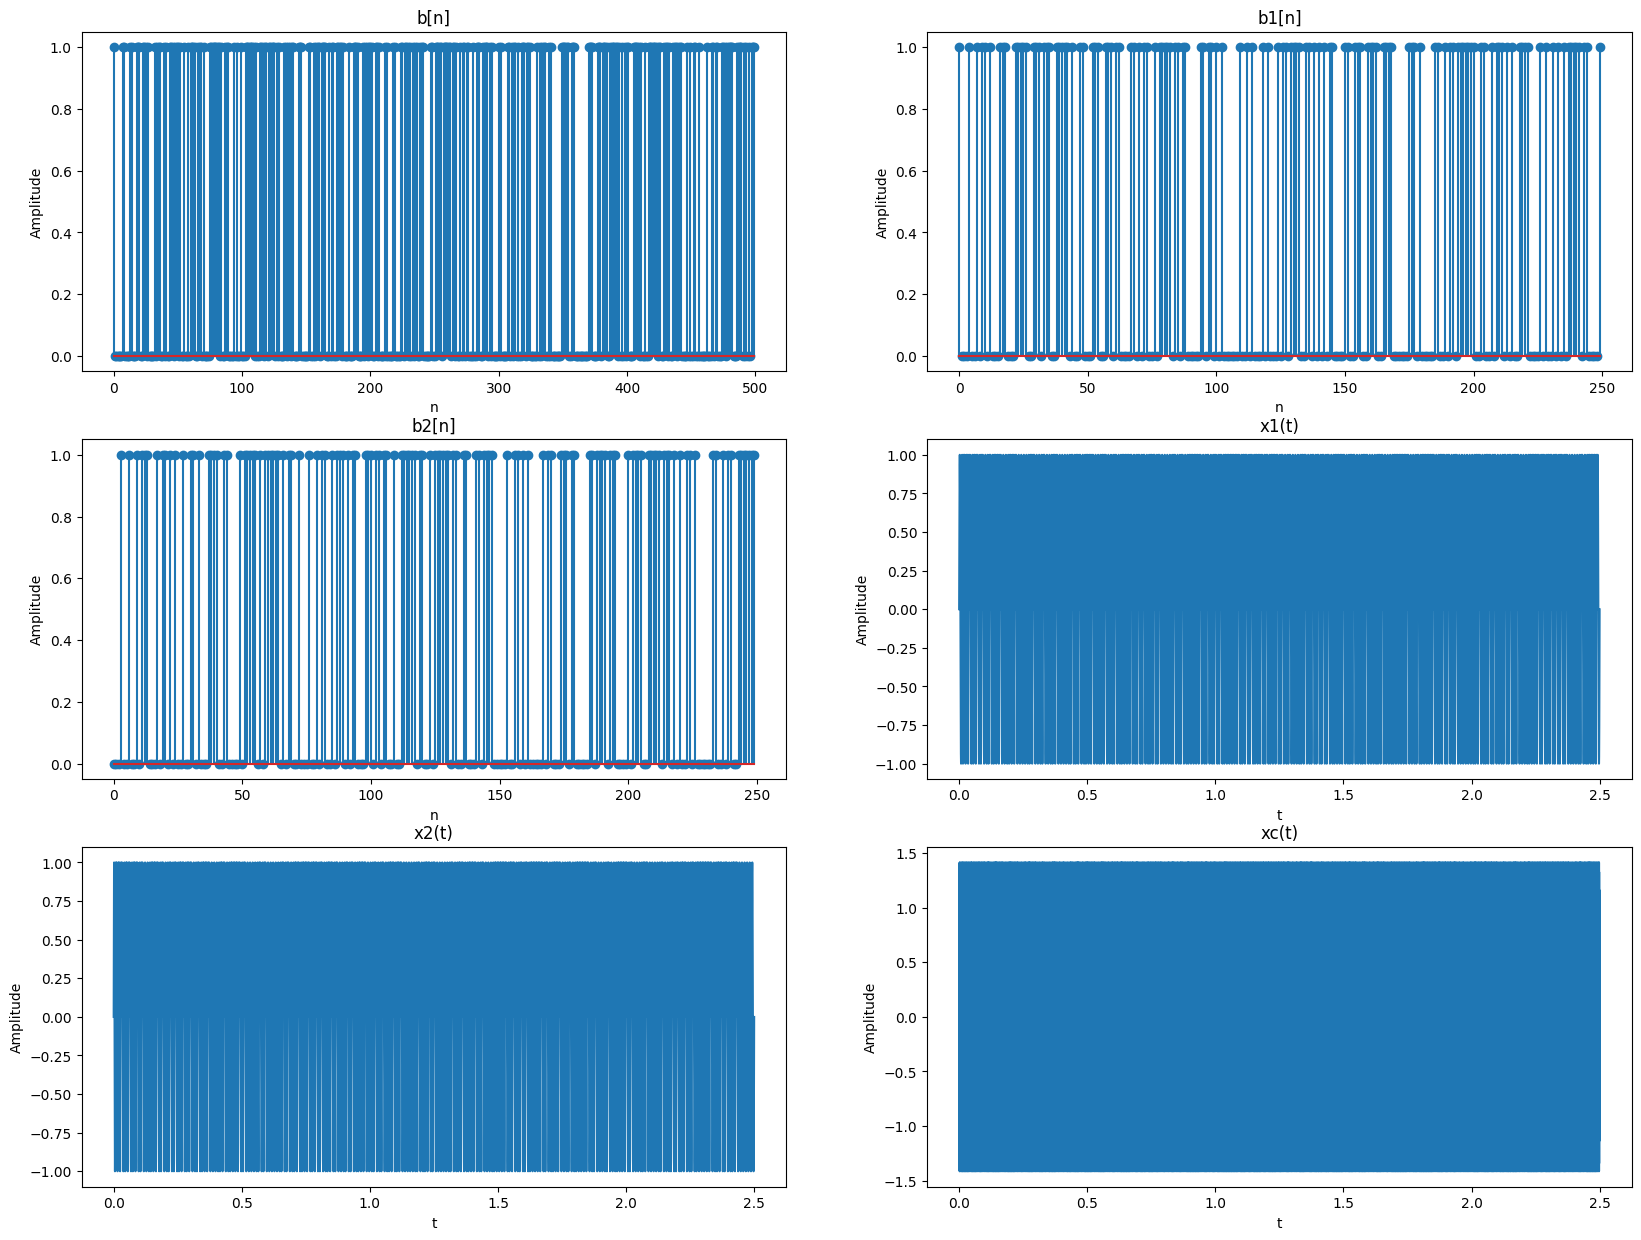

In [26]:
def fsk_pulse_one(duration, sampling_freq):
    t = np.arange(0, duration, 1 / sampling_freq)
    pulse = np.ones_like(t)*np.sin(2*np.pi*100*t)
    return pulse

def fsk_pulse_zero(duration, sampling_freq):
    t = np.arange(0, duration, 1 / sampling_freq)
    pulse = np.ones_like(t)*np.sin(2*np.pi*150*t)
    return pulse

fsk_pulse_one = fsk_pulse_one(duration, fs)
fsk_pulse_zero = fsk_pulse_zero(duration, fs)


fsk_b = np.random.randint(2, size=n)
fsk_b1, fsk_b2 = divider(fsk_b)
fsk_x1 = pulseShaping(fsk_b1, fsk_pulse_zero, fsk_pulse_one)
fsk_x2 = pulseShaping(fsk_b2, fsk_pulse_zero, fsk_pulse_one)
fsk_xc = analogMod(fsk_x1,fsk_x1,fc,fs)

t1 = np.arange(0, duration*n/2, 1 / fs)
t = np.arange(0, duration*n, 1 / fs)

plt.figure(figsize=(20, 15))

plt.subplot(3,2,1)
plt.stem(fsk_b)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b[n]')

plt.subplot(3,2,2)
plt.stem(fsk_b1)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b1[n]')

plt.subplot(3,2,3)
plt.stem(fsk_b2)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b2[n]')

plt.subplot(3,2,4)
plt.plot(t1,fsk_x1)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x1(t)')

plt.subplot(3,2,5)
plt.plot(t1,fsk_x2)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x2(t)')


plt.subplot(3,2,6)
plt.plot(t1,fsk_xc)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('xc(t)')


Text(0.5, 1.0, 'part of xc(t)')

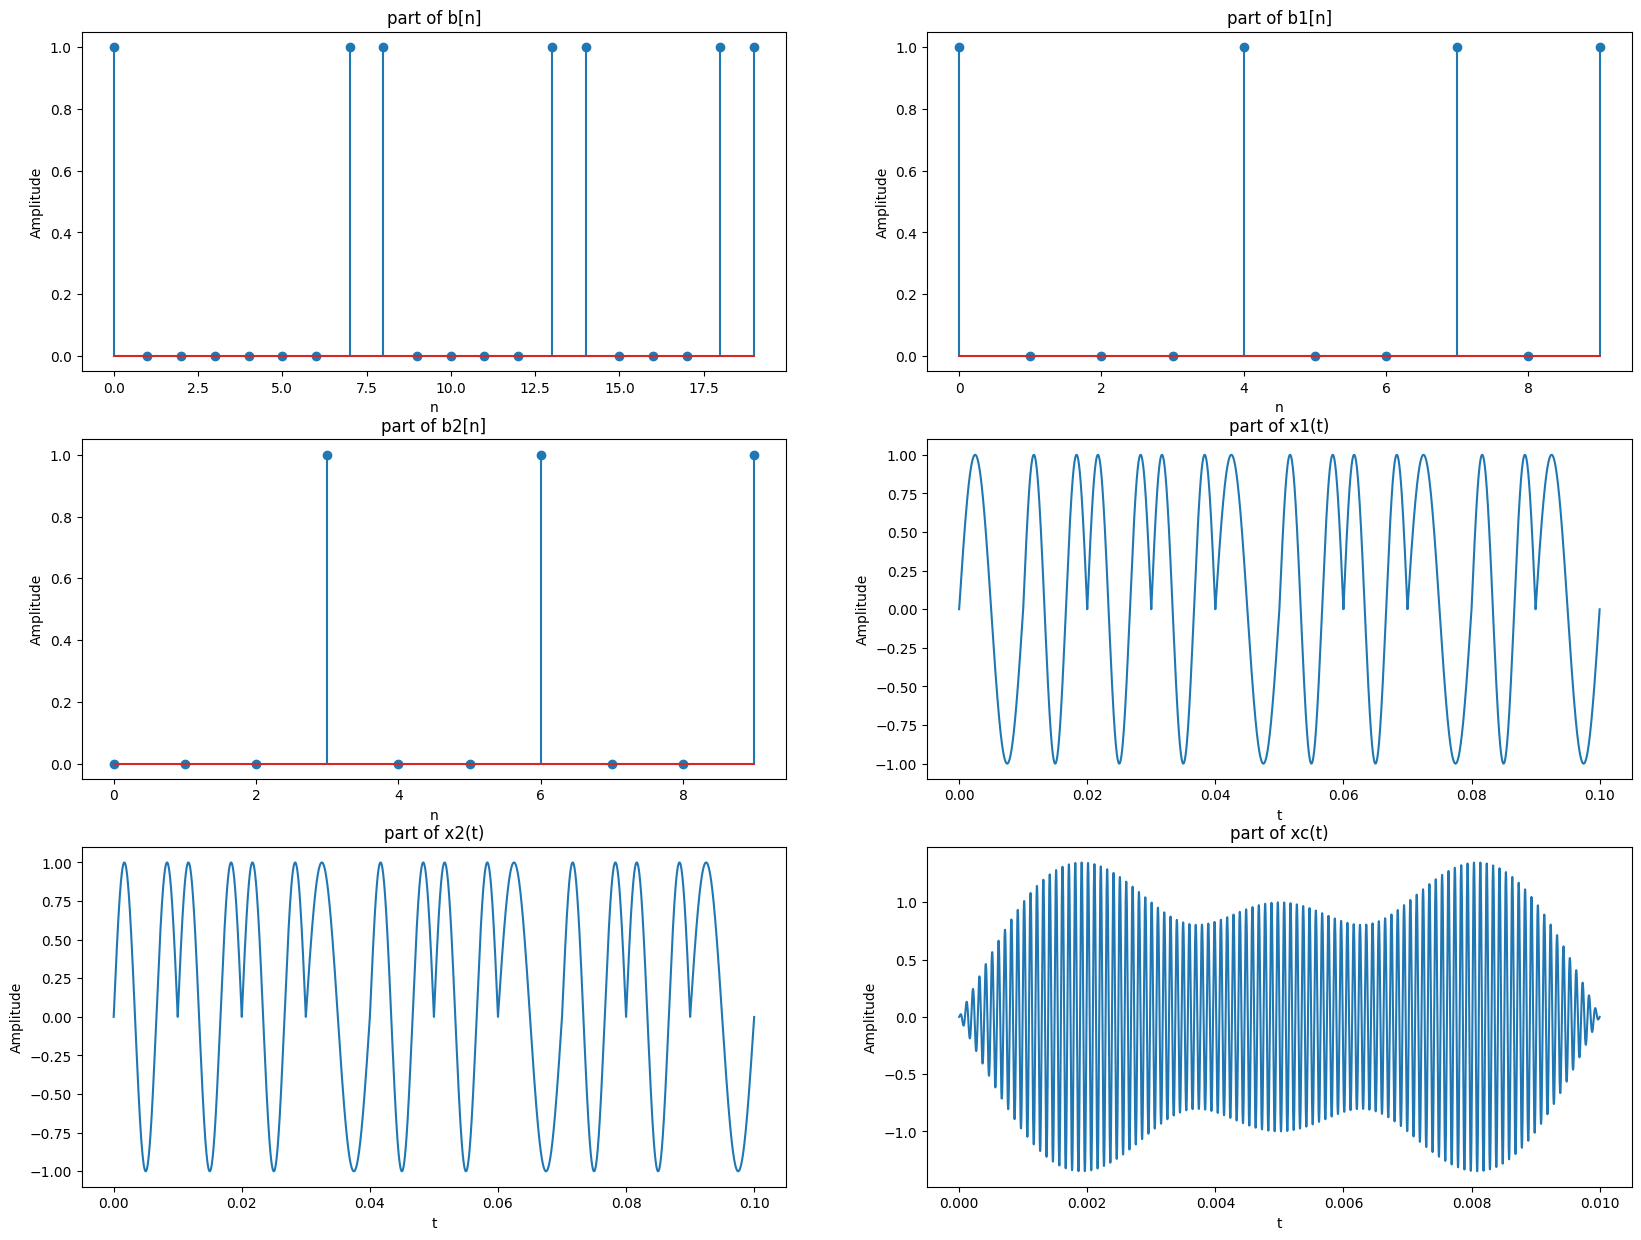

In [27]:
t1 = np.arange(0, duration*n/2, 1 / fs)
t = np.arange(0, duration*n, 1 / fs)
fsk_x1 = pulseShaping(fsk_b1, fsk_pulse_zero, fsk_pulse_one)
fsk_x2 = pulseShaping(fsk_b2, fsk_pulse_zero, fsk_pulse_one)
fsk_xc = analogMod(fsk_x1,fsk_x2,fc,fs)

plt.figure(figsize=(20, 15))

plt.subplot(3,2,1)

plt.stem(fsk_b[0:20])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('part of b[n]')

plt.subplot(3,2,2)
plt.stem(fsk_b1[0:10])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('part of b1[n]')

plt.subplot(3,2,3)
plt.stem(fsk_b2[0:10])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('part of b2[n]')

plt.subplot(3,2,4)
plt.plot(t1[0:100000],fsk_x1[0:100000])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('part of x1(t)')

plt.subplot(3,2,5)
plt.plot(t1[0:100000],fsk_x2[0:100000])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('part of x2(t)')

plt.subplot(3,2,6)
plt.plot(t1[0:10000],fsk_xc[0:10000])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('part of xc(t)')


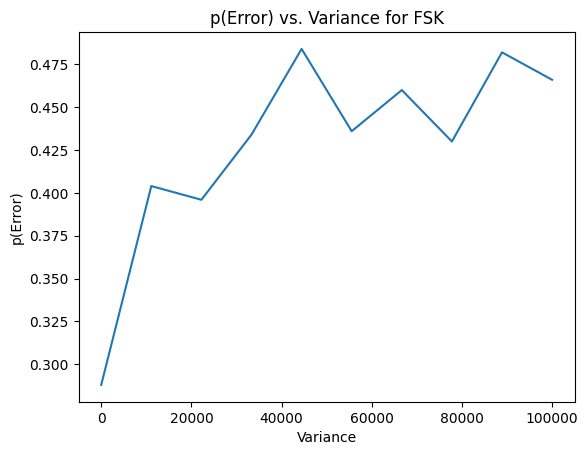

In [28]:
fsk_bandpass_signal=channel(fsk_xc,fc,fs,bw)
def simulate_and_calculate_error(variance,bandpass_signal):
    w = variance
    noise = np.random.normal(loc=0, scale=np.sqrt(w), size=len(bandpass_signal))
    noised_signal=bandpass_signal+noise
    fsk_demodulated_signal_1, fsk_demodulated_signal_2=analogDemod(noised_signal,fs,bw,fc)
    _, _, fsk_estimated_bits1 = matchedFilt(fsk_demodulated_signal_1, fsk_pulse_zero, fsk_pulse_one,n)
    _, _, fsk_estimated_bits2 = matchedFilt(fsk_demodulated_signal_2, fsk_pulse_zero, fsk_pulse_one,n)
    
    fsk_estimated_bits = []
    for i in range(len(estimated_bits1)):
        fsk_estimated_bits.append(fsk_estimated_bits1[i])
        fsk_estimated_bits.append(fsk_estimated_bits2[i])
    
    error = np.sum(fsk_estimated_bits != fsk_b)
    return error

def get_estimated(variance,bandpass_signal):
    w = variance
    noise = np.random.normal(loc=0, scale=np.sqrt(w), size=len(bandpass_signal))
    noised_signal=bandpass_signal+noise
    fsk_demodulated_signal_1, fsk_demodulated_signal_2=analogDemod(noised_signal,fs,bw,fc)
    _, _, fsk_estimated_bits1 = matchedFilt(fsk_demodulated_signal_1, fsk_pulse_zero, fsk_pulse_one,n)
    _, _, fsk_estimated_bits2 = matchedFilt(fsk_demodulated_signal_2, fsk_pulse_zero, fsk_pulse_one,n)
    return fsk_estimated_bits1, fsk_estimated_bits2
    

fsk_estimated_bits1, fsk_estimated_bits2 = get_estimated(100,bandpass_signal)

variance_vals = np.linspace(0, 100000, 10)  
error_values = [simulate_and_calculate_error(v,fsk_bandpass_signal)/n for v in variance_vals]
plt.plot(variance_vals, error_values)
plt.xlabel('Variance')
plt.ylabel('p(Error)')
plt.title('p(Error) vs. Variance for FSK')
plt.show()

The plot of "P(Error) vs. Variance" shows how the bit error rate (P(Error)) changes as the variance of the added noise increases. The assumption here is that the higher the variance, the noisier the communication channel.

The reason the P(Error) vs. Variance plot tends to be an ascending function (increasing as variance increases) can be explained by the impact of noise on the communication system:

Increased Noise Levels: As the variance of the added noise increases, the amplitude and randomness of the noise in the communication channel also increase. Higher noise levels can lead to a greater likelihood of errors in the received signal.

Demodulation Challenges: In the demodulation process, higher levels of noise can make it more challenging to accurately recover the transmitted signal. The presence of noise can cause fluctuations in the received signal, leading to errors in estimating the original transmitted bits.

Matched Filtering Sensitivity: The system in the provided code uses matched filtering for demodulation. Matched filtering is sensitive to variations in the received signal. Increased noise levels can affect the signal-to-noise ratio, making it more difficult for the matched filter to distinguish between different transmitted symbols.

Probability of Error: The bit error rate (P(Error)) is a measure of the probability that a received bit is incorrectly decoded. As the noise level increases, the probability of errors in the received signal also increases, leading to a higher bit error rate.

Signal-to-Noise Ratio (SNR): The relationship between the signal power and the noise power (expressed as SNR) becomes less favorable with higher noise levels. In a noisy environment, the signal may be overwhelmed by noise, making it more challenging to recover the original information accurately.

C:\Users\Matin\AppData\Local\Temp\ipykernel_13468\2134043304.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  fsk_estimated_bits1_s[jj] = 2 * k / E_0
C:\Users\Matin\AppData\Local\Temp\ipykernel_13468\2134043304.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  fsk_estimated_bits2_s[jj] = 2 * k / E_0


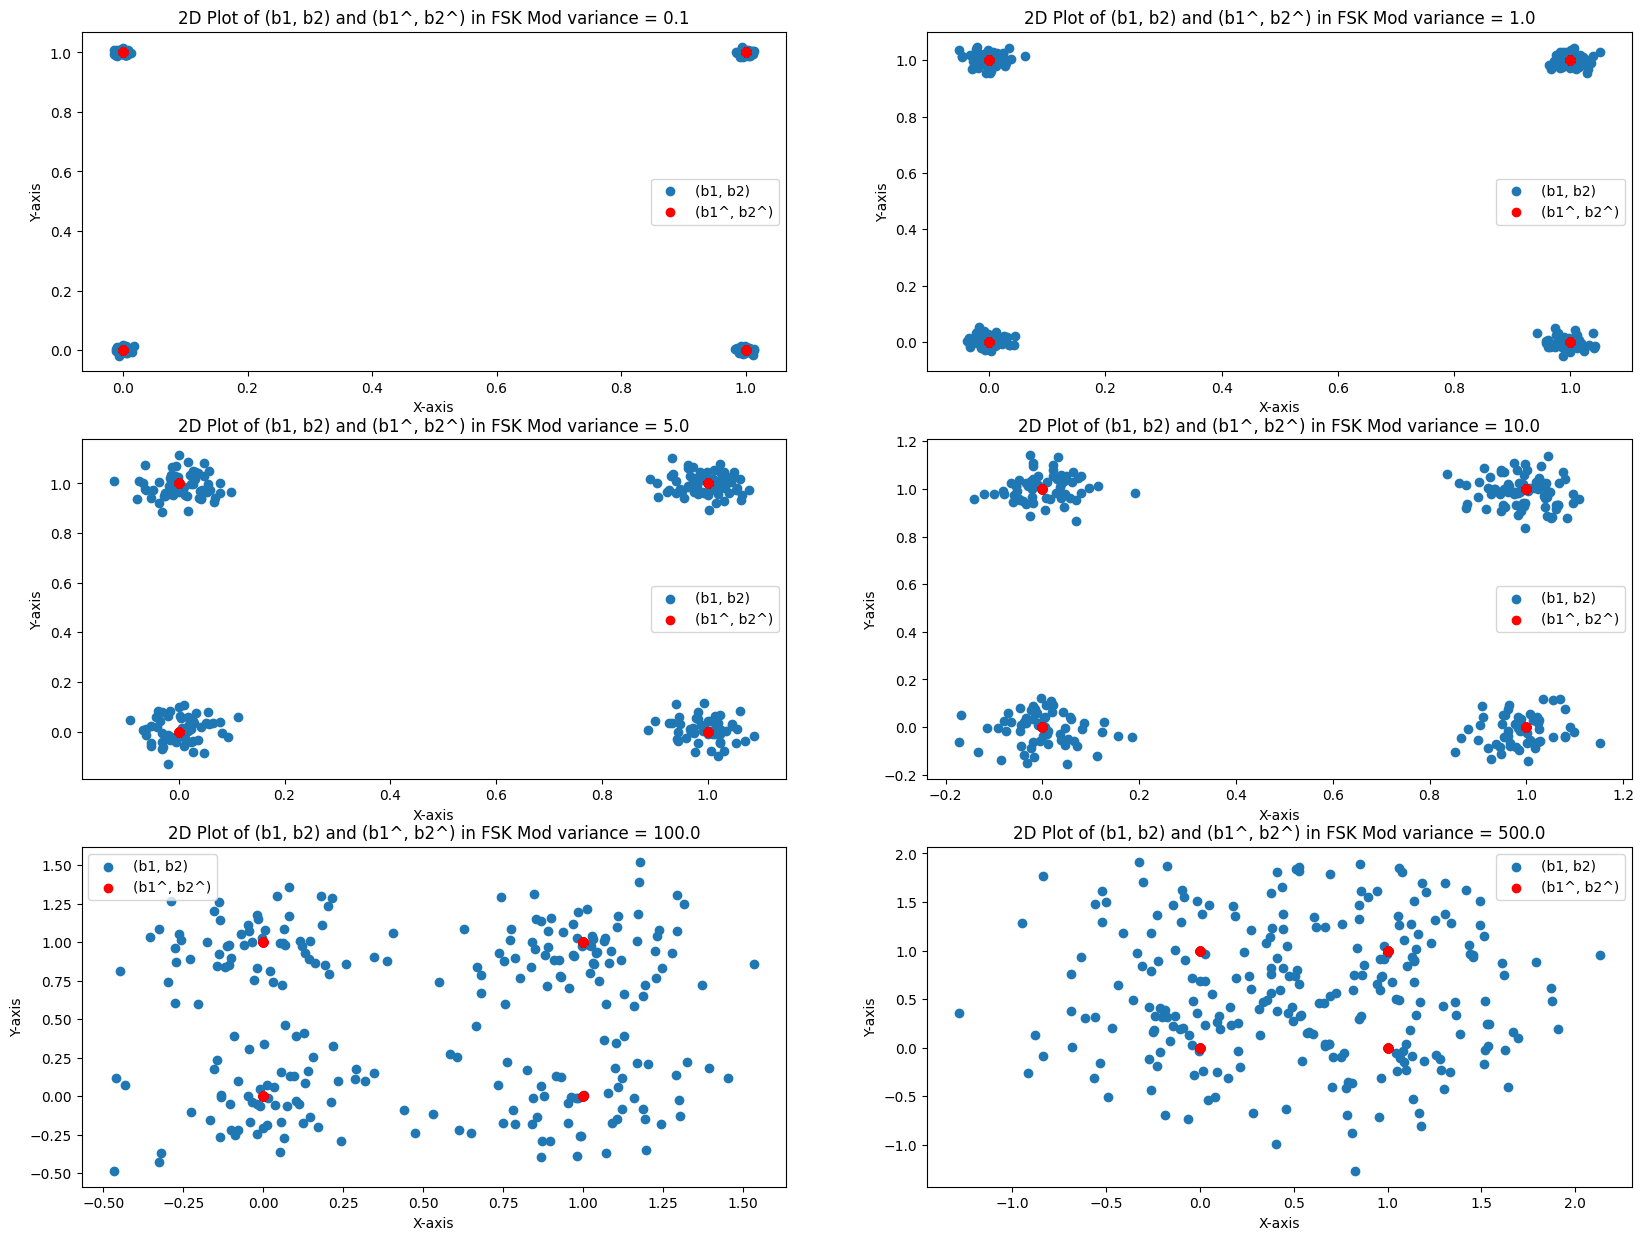

In [49]:
variance_vals = np.array([0.1, 1, 5, 10, 100, 500])
i = 1
plt.figure(figsize=(20, 15))

for variance in variance_vals:
    fsk_noise = np.random.normal(loc=0, scale=np.sqrt(variance), size=len(fsk_bandpass_signal))
    fsk_noised_signal = fsk_bandpass_signal + fsk_noise
    fsk_demodulated_signal_1, fsk_demodulated_signal_2 = analogDemod(fsk_noised_signal, fs, bw, fc)
    fsk_output_matched_0_1, fsk_output_matched_1_1, fsk_estimated_bits1 = matchedFilt(fsk_demodulated_signal_1, fsk_pulse_zero, fsk_pulse_one, n)
    E_0 = np.sum(np.abs(fsk_pulse_one)**2)  # Compute E_0 using NumPy sum
    jj = 0
    fsk_estimated_bits1_s = np.zeros(len(fsk_estimated_bits1))
    for k in fsk_output_matched_1_1[int(len(fsk_pulse_zero))-1::int(len(fsk_pulse_zero))]:
        fsk_estimated_bits1_s[jj] = 2 * k / E_0
        jj += 1

    jj = 0
    fsk_estimated_bits2_s = np.zeros(len(fsk_estimated_bits2))
    fsk_output_matched_0_2, fsk_output_matched_1_2, fsk_estimated_bits2 = matchedFilt(fsk_demodulated_signal_2, fsk_pulse_zero, fsk_pulse_one, n)
    for k in fsk_output_matched_1_2[int(len(fsk_pulse_zero))-1::int(len(fsk_pulse_zero))]:
        fsk_estimated_bits2_s[jj] = 2 * k / E_0
        jj += 1

    fsk_a_points = list(zip(fsk_estimated_bits1_s, fsk_estimated_bits2_s))
    fsk_b_points = list(zip(fsk_b1, fsk_b2))
    fsk_a_x, fsk_a_y = zip(*fsk_a_points)
    fsk_b_x, fsk_b_y = zip(*fsk_b_points)

    plt.subplot(3, 2, i)
    i = i + 1
    plt.scatter(fsk_a_x, fsk_a_y, label='(b1, b2)')
    plt.scatter(fsk_b_x, fsk_b_y, label='(b1^, b2^)', color="red")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('2D Plot of (b1, b2) and (b1^, b2^) in FSK Mod variance = ' + str(variance))
    plt.legend()

# Move plt.show() outside the loop
plt.show()


# 3.4:

As observed, considering the provided values for each of the modulations, PAM had the best performance against noise. Following that, FSK performed better than PSK, and the performance of PSK was weaker compared to the other cases.

# 4:

# 4.1:

1. SourceGenerator:

Input: Takes a sequence of integers (integer_sequence).

Output: Returns a binary sequence (binary_sequence).

Process:

Iterates through each integer in the input sequence.
Converts each integer to its binary representation using bin() and removes the '0b' prefix using [2:].
Fills the binary representation to ensure it has a length of 8 using zfill(8).
Extends the binary_sequence with the individual binary digits (converted to integers) from each binary representation.
Returns the resulting binary sequence.

2. OutputDecoder:

Input: Takes a binary sequence (binary_sequence).

Output: Returns a sequence of integers (integer_sequence).

Process:

Iterates through the binary sequence in chunks of 8.
Converts each binary chunk to an integer using int() and " ".join(map(str, map(round, binary_chunk))).
The use of round ensures that any non-integer values (which should not occur in binary representations) are rounded to integers.
The resulting integer is appended to the integer_sequence.
Returns the resulting sequence of integers.

In [30]:
def SourceGenerator(integer_sequence):
    binary_sequence = []
    for integer_value in integer_sequence:
        binary_representation = bin(integer_value)[2:]
        binary_sequence.extend(map(int, binary_representation.zfill(8)))
    return binary_sequence

def OutputDecoder(binary_sequence):
    integer_sequence = []
    for i in range(0, len(binary_sequence), 8):
        binary_chunk = binary_sequence[i:i+8]
        integer_value = int("".join(map(str, map(round, binary_chunk))), 2)
        integer_sequence.append(integer_value)

    return integer_sequence


# 4.2:

sg_b - Original Binary Sequence:

plt.subplot(3, 2, 1): A stem plot of the original binary sequence sg_b. Each stem represents a binary value in the sequence.
sg_b1 - Binary Sequence (Even Indices):

plt.subplot(3, 2, 2): A stem plot of the binary sequence sg_b1 containing the even indices of the original sequence.
sg_b2 - Binary Sequence (Odd Indices):

plt.subplot(3, 2, 3): A stem plot of the binary sequence sg_b2 containing the odd indices of the original sequence.
sg_x1 - Pulse Shaped Signal (Even Indices):

plt.subplot(3, 2, 4): A plot of the pulse-shaped signal sg_x1 obtained by applying pulse shaping to sg_b1.
sg_x2 - Pulse Shaped Signal (Odd Indices):

plt.subplot(3, 2, 5): A plot of the pulse-shaped signal sg_x2 obtained by applying pulse shaping to sg_b2.
sg_xc - Modulated Signal:

plt.subplot(3, 2, 6): A plot of the modulated signal sg_xc obtained by analog modulation of sg_x1 and sg_x2.


Text(0.5, 1.0, 'xc(t)')

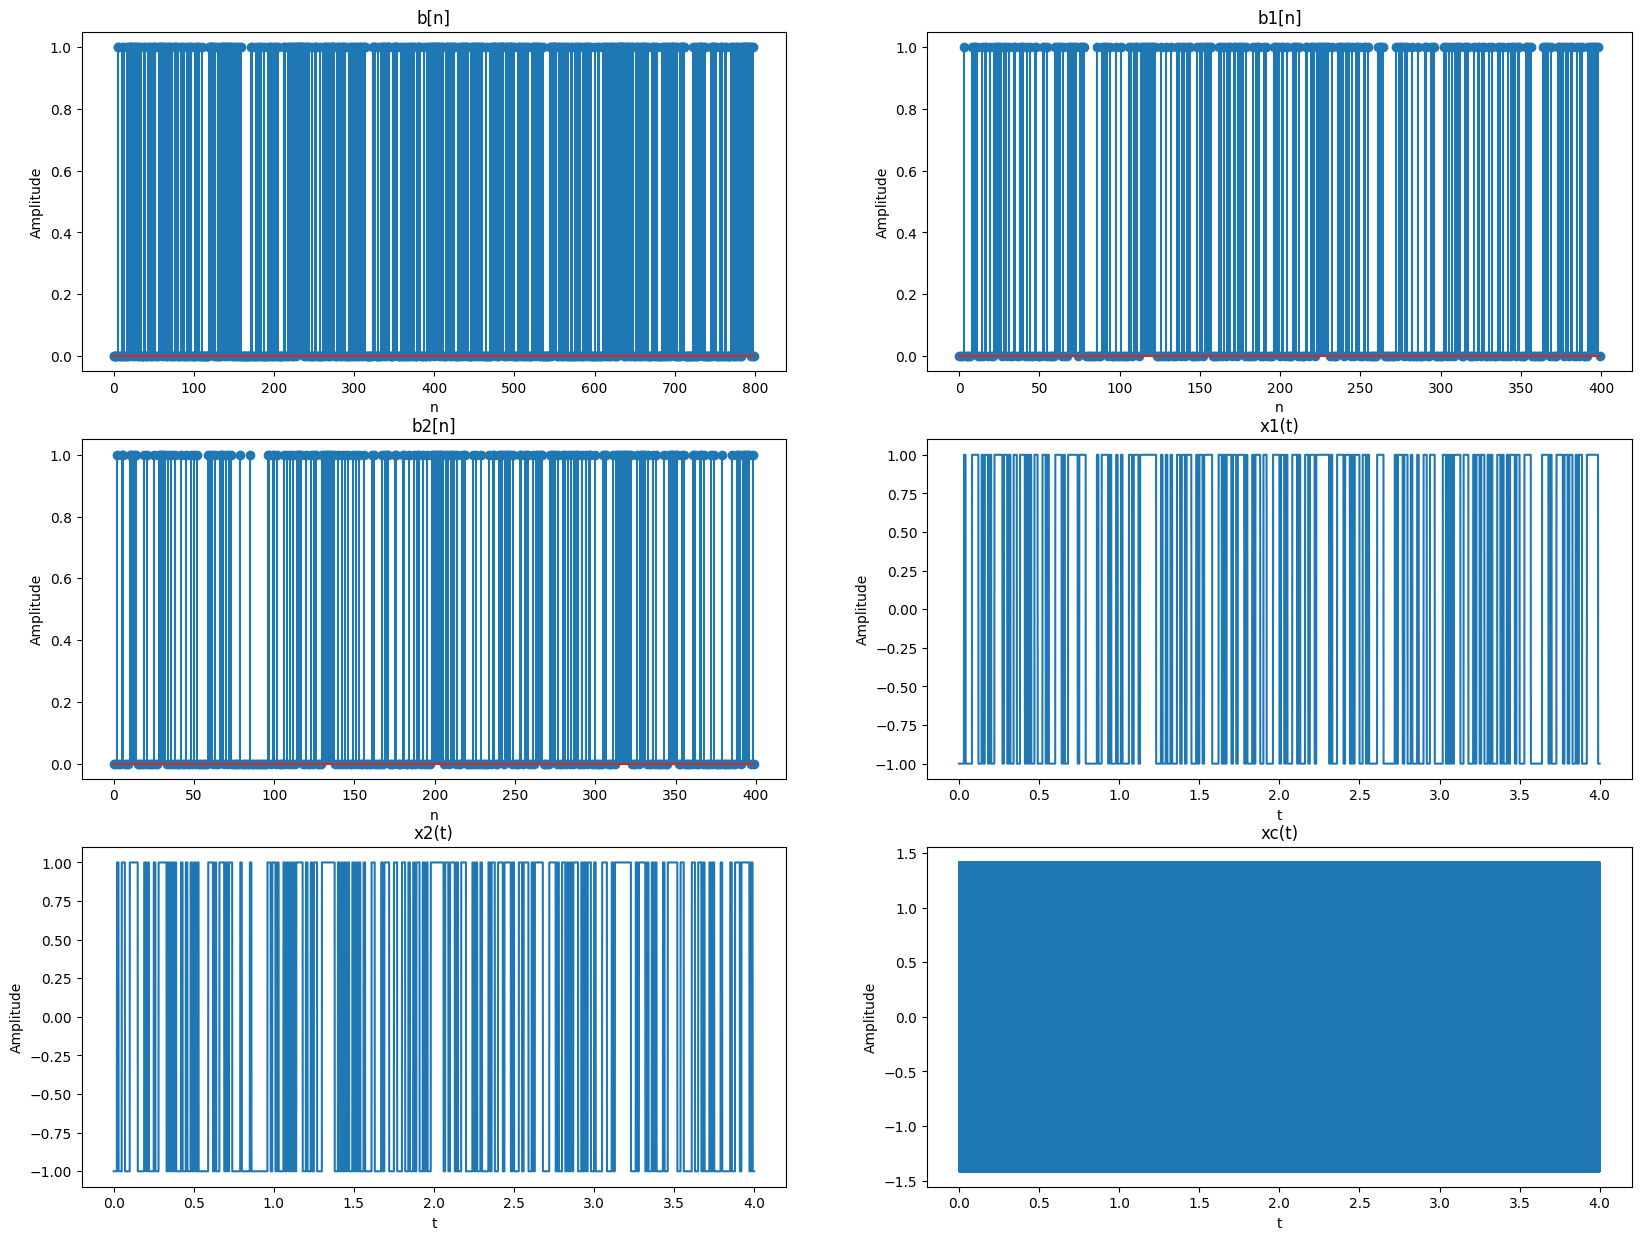

In [31]:
new_sequence = np.random.randint(0, 256, size=100)
new_n=800
sg_b = SourceGenerator(new_sequence)
t1 = np.arange(0, duration*new_n/2, 1 / fs)
t = np.arange(0, duration*new_n, 1 / fs)

sg_b1, sg_b2 = divider(sg_b)
pulse_zero = pam_pulse_zero
pulse_one = pam_pulse_one
sg_x1 = pulseShaping(sg_b1, pulse_zero, pulse_one)
sg_x2 = pulseShaping(sg_b2, pulse_zero, pulse_one)
sg_xc = analogMod(sg_x1,sg_x2,fc,fs)

plt.figure(figsize=(20, 15))

plt.subplot(3,2,1)
plt.stem(sg_b)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b[n]')

plt.subplot(3,2,2)
plt.stem(sg_b1)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b1[n]')

plt.subplot(3,2,3)
plt.stem(sg_b2)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b2[n]')

plt.subplot(3,2,4)
plt.plot(t1,sg_x1)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x1(t)')

plt.subplot(3,2,5)
plt.plot(t1,sg_x2)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x2(t)')

plt.subplot(3,2,6)
plt.plot(t1,sg_xc)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('xc(t)')

Text(0.5, 1.0, 'xc(t)')

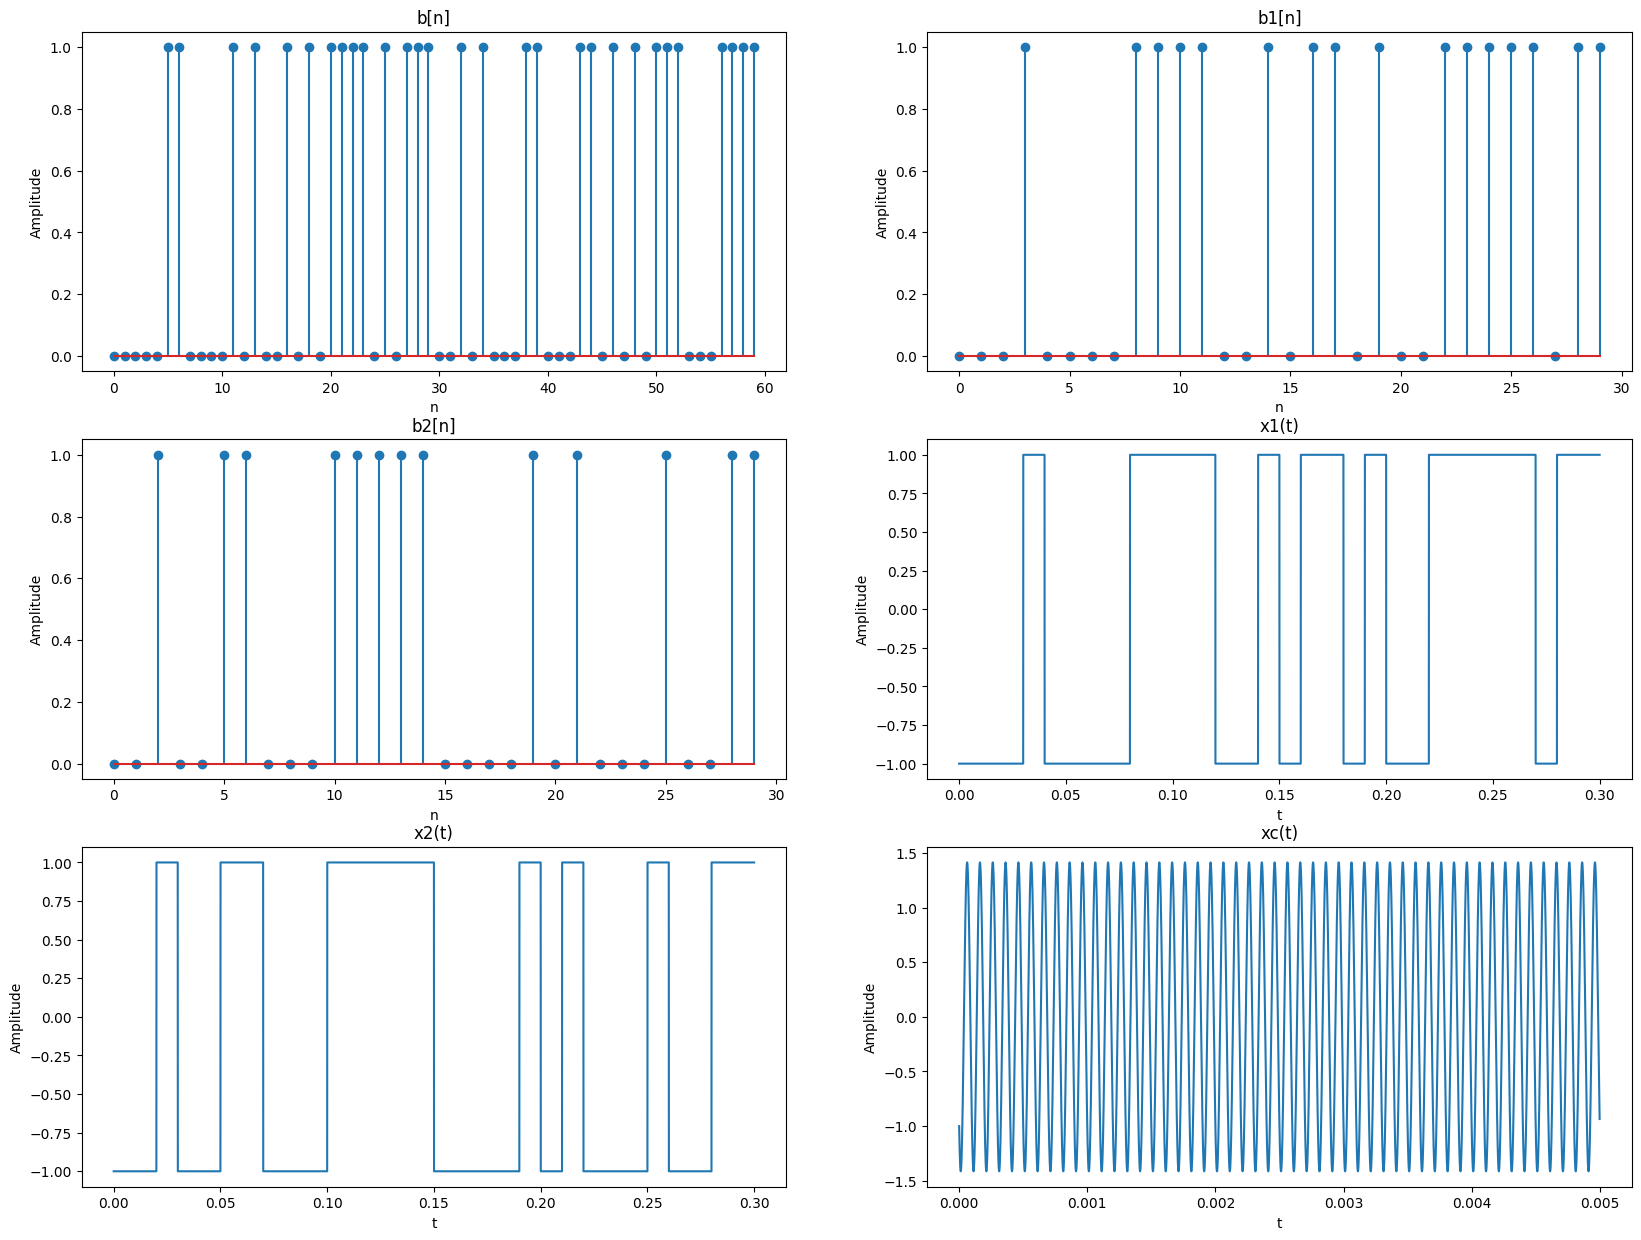

In [32]:
sg_x1 = pulseShaping(sg_b1, pulse_zero, pulse_one)
sg_x2 = pulseShaping(sg_b2, pulse_zero, pulse_one)
sg_xc = analogMod(sg_x1,sg_x2,fc,fs)

plt.figure(figsize=(20, 15))

plt.subplot(3,2,1)

plt.stem(sg_b[:60])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b[n]')
plt.subplot(3,2,2)

plt.stem(sg_b1[:30])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b1[n]')

plt.subplot(3,2,3)
plt.stem(sg_b2[:30])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('b2[n]')

plt.subplot(3,2,4)
plt.plot(t1[:300000],sg_x1[:300000])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x1(t)')

plt.subplot(3,2,5)
plt.plot(t1[:300000],sg_x2[:300000])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x2(t)')

plt.subplot(3,2,6)
plt.plot(t1[:5000],sg_xc[:5000])
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('xc(t)')

# 4.3:

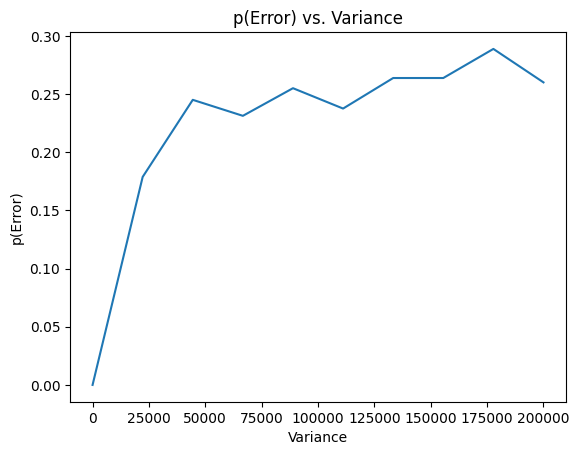

In [54]:
sg_bandpass_signal=channel(sg_xc,fc,fs,bw)
def calculate_error(variance,bandpass_signal,N):
    w = variance
    noise = np.random.normal(loc=0, scale=np.sqrt(w), size=len(bandpass_signal))
    noised_signal=bandpass_signal+noise
    demodulated_signal_1, demodulated_signal_2 = analogDemod(noised_signal,fs,bw,fc)
    _, _, sg_estimated_bits1 = matchedFilt(demodulated_signal_1, pulse_zero, pulse_one,N)
    _, _, sg_estimated_bits2 = matchedFilt(demodulated_signal_2, pulse_zero, pulse_one,N)
    sg_estimated_bits = []
    for i in range(len(estimated_bits1)):
        sg_estimated_bits.append(sg_estimated_bits1[i])
        sg_estimated_bits.append(sg_estimated_bits2[i])
    error=0
    for i in range(len(sg_estimated_bits)):
        if sg_estimated_bits[i] != sg_b[i]:
            error+=1
    return error
variance_vals = np.linspace(1, 200000, 10)  
error_values = [calculate_error(variance,sg_bandpass_signal,new_n)/new_n for variance in variance_vals]
plt.plot(variance_vals, error_values)
plt.xlabel('Variance')
plt.ylabel('p(Error)')
plt.title('p(Error) vs. Variance')
plt.show()

Let's see what probability it converges:

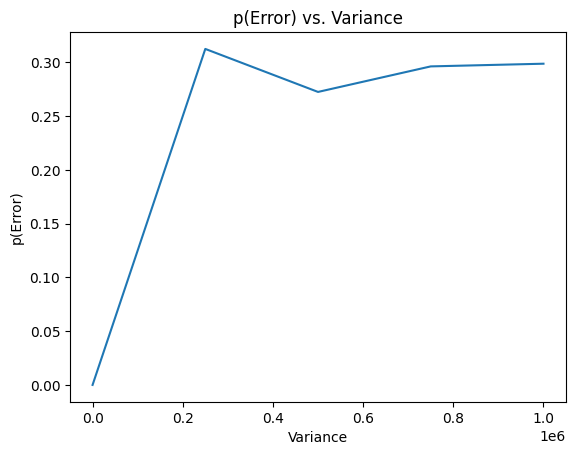

In [55]:
variance_vals = np.linspace(1, 1_000_000, 5)  
error_values = [calculate_error(variance,sg_bandpass_signal,new_n)/new_n for variance in variance_vals]
plt.plot(variance_vals, error_values)
plt.xlabel('Variance')
plt.ylabel('p(Error)')
plt.title('p(Error) vs. Variance')
plt.show()

Obviously, it converges to p = 0.28 as the variance grows!!

# 4.4:

When the noise tends towards infinity, the system's output becomes completely random. Since we assumed the input to be random as well, we can consider two random sequences for input and output and calculate the variance of their difference. This process is repeated a thousand times for sequences of length ten thousand. As mentioned in the notebook, this converges to a value of approximately 10921. This behavior is evident in the plot, where around this value, there are fluctuations in very high levels of noise.

In [34]:
max_iteration = 20000

res = 0

for _ in tqdm(range(max_iteration)):
    x1 = np.random.randint(0, 256, 10_000)
    x2 = np.random.randint(0, 256, 10_000)
    res += np.var(x1 - x2)/ max_iteration
print("Converges to" ,round(res,2))    

  0%|          | 0/20000 [00:00<?, ?it/s]

100%|██████████| 20000/20000 [00:02<00:00, 7475.90it/s]


Converges to 10920.86


In [35]:
def decimalToBinary(n): 
    a= list(map(int, str("{0:b}".format(int(n)) )))
    for i in range(8-len(a)):
        a = [0]+a
    return a

def binaryToDecimal(stringn):
    return int(stringn, 2)

def sourceGenerator(inp):
    result = []
    for n in inp:
        result += decimalToBinary(n)
    
    return result
        

def outputDecoder(inp):
    result = []
    j=0
    temp =''
    for i in range(len(inp)):
        temp += str(int(inp[i]))
        j+=1
        if j ==8:
            result.append(binaryToDecimal(temp))
            temp = ''
            j=0
    return result

C:\Users\Matin\AppData\Local\Temp\ipykernel_13468\1703465840.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  sampleTimeFilterOut[i] = matchFiltR1[t0]


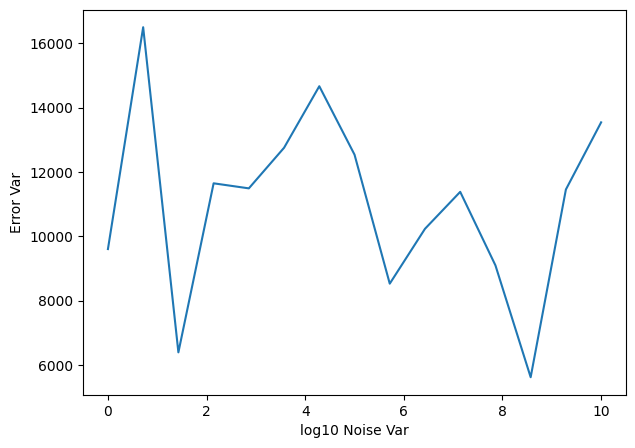

In [40]:
baseParams = {'fs':1e6, 'tb':1e-2, 'fc':1e4, 'bwc':1e3}

def rectPulse(fs, hrate, tb):
    n = int(np.ceil(tb*fs))
    m = int(np.floor(n*(1-hrate))/2)
    a = np.ones(n-(2*m))
    b = np.zeros(m)
    return np.concatenate([b, a, b])

def addWGNtoSig(inputSig, noiseVar):
    n = np.random.normal(0,noiseVar**0.5, len(inputSig))
    return inputSig+n

def matched_Filt(inputSig, zeroPulse, onePulse):
    filtZero = np.flip(zeroPulse)
    filtOne = np.flip(onePulse)
    matchFiltR1, matchFiltR0 = np.zeros(len(inputSig)), np.zeros(len(inputSig))
    bitNum = int(len(inputSig)/len(zeroPulse))
    matchFiltR1 = np.convolve(filtOne, inputSig, 'same')/len(filtOne)
    matchFiltR0 = np.convolve(filtZero, inputSig, 'same')/len(filtZero)
    bitResult = np.zeros(bitNum)
    sampleTimeFilterOut = np.zeros(bitNum)
    t0 = int(len(zeroPulse)/2)
    for i in range(bitNum):
        if matchFiltR1[t0] > matchFiltR0[t0]:
            bitResult[i] = 1
            
        sampleTimeFilterOut[i] = matchFiltR1[t0]
        t0+=len(zeroPulse)
    
    return (matchFiltR0, matchFiltR1), bitResult, sampleTimeFilterOut



def combine(input1, input2):
    result = np.ones(len(input1)+len(input2))
    result[np.arange(0,len(result),2)] = input1[:]
    result[np.arange(1,len(result),2)] = input2[:]
    return result

numberOfBytes = 15
mainM = np.random.randint(0,256,numberOfBytes)
message = sourceGenerator(mainM) 
varVals = np.logspace(0,10,15)

dividedM1, dividedM2 = divider(message)
pulse = rectPulse(baseParams['fs'], 1, baseParams['tb'])
ak0 , ak1 = -1,1
m1AnalogPulse, m2AnalogPulse = pulseShaping(dividedM1, ak0*pulse, ak1*pulse), pulseShaping(dividedM2, ak0*pulse, ak1*pulse)
sentSig = analogMod(m1AnalogPulse, m2AnalogPulse, baseParams['fs'], baseParams['fc'])
channelOutSig =channel(sentSig, baseParams['fs'], baseParams['fc'], baseParams['bwc'])
tempResult = []
for var in varVals:
    noisySig = addWGNtoSig(channelOutSig, var)
    demodBW = baseParams['bwc']
    demodSig1, demodSig2 = analogDemod(noisySig, baseParams['fs'], baseParams['fc'], demodBW)
    matchOutsig1, bitR1, _ = matched_Filt(demodSig1, ak0*pulse, ak1*pulse)
    matchOutsig2, bitR2, _ = matched_Filt(demodSig2, ak0*pulse, ak1*pulse)
    outputBits = combine(bitR1,bitR2)
    tempR = np.array(outputDecoder(outputBits))
    tempResult.append(np.var(tempR - mainM))
    
    


plt.figure(figsize=(7,5))
plt.plot(np.log10(varVals),tempResult);
plt.xlabel('log10 Noise Var')
plt.ylabel('Error Var');



As mentioned in the notebook, this converges to a value of approximately 10921.

# 5:

In Figure 1 of this question, the value of this function is plotted for different values of mu. Since our signal's range is less than one, in the region between -1 and +1, this function is significant for us. This non-linear function has a higher slope for smaller x values, and as it approaches -1 and 1, the saturated form becomes more pronounced.

In Figure 1, the sound is shown in the second row of the image at a certain time.

The normalized signal has been plotted, which has a power of 0.95 dBm.

In the third row of the plots on the next page, the RMS of the combination of two functions is plotted based on mu, which has a very small value.

The plot of this section, along with the plots of section 9, is plotted in the fourth row, which shows that the SNR with all plotted values for mu is higher than the SNR without using the Fourier transform, so it has had a positive effect.

In the fifth row, the requested plot is drawn.

As we can see in the last plot on the next page, the SNR without Fourier transform is better than all cases. The reason for the proper functioning of the Fourier transform is that our sound is often in lower frequency ranges (clearly seen from the plotted signals in the second row). When we use the Fourier transform, before quantization, due to the steeper slope in x values near zero, the signal is opened up, and a higher quantization level is assigned to these values, resulting in better performance. However, we have seen that when used inversely, since higher levels are given to signals with a higher range, the performance decreases.






# 5.1:

Code defines a μ-law compressor function and plots the compressed output for various values of the parameter μ. The μ-law compression is commonly used in telecommunications and audio processing to non-linearly compress the dynamic range of signals.

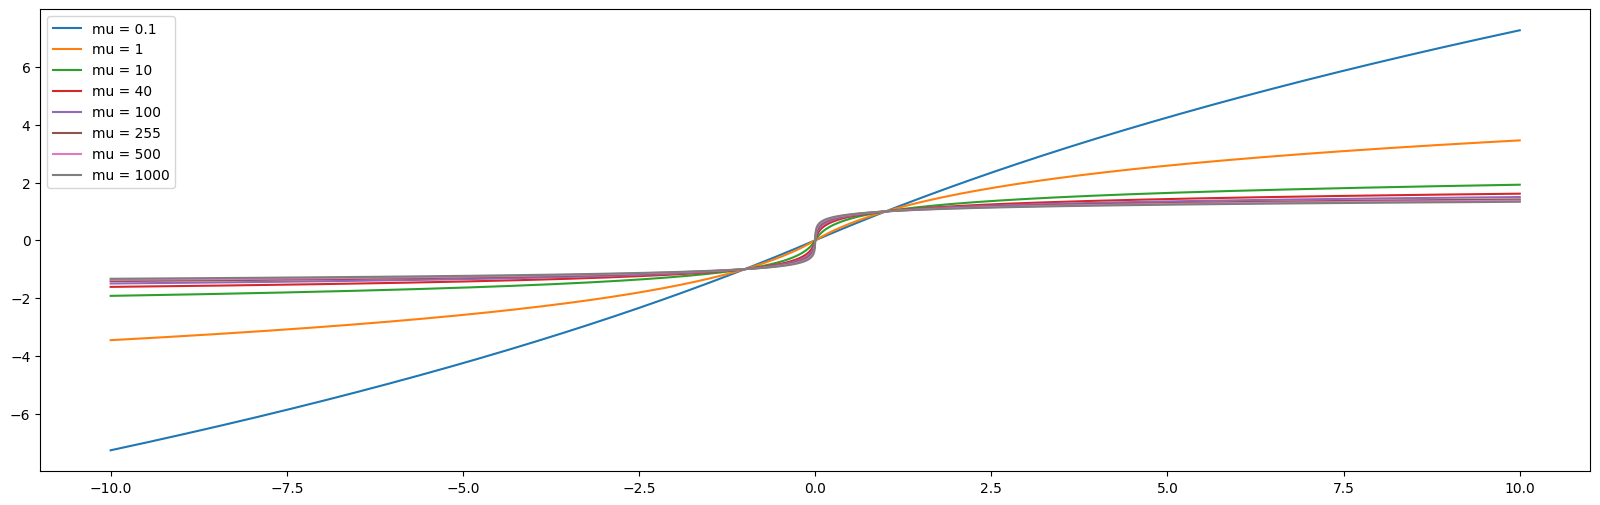

In [33]:
def ulaw_compressor(input, mu):
    return np.sign(input)*np.log(1+mu*np.abs(input))/np.log(1+mu)

x = np.linspace(-10,10,2000)
plt.figure(figsize=(20, 6))

mu_values = [0.1, 1, 10, 40, 100, 255, 500, 1000]
for u in mu_values:
    plt.plot(x, ulaw_compressor(x, u), label =('mu = '+str(u)))
plt.legend()


Behavior Explanation:

np.abs(input): Takes the absolute values of each element in the input signal.
mu * np.abs(input): Multiplies the absolute values by the compression parameter mu.
1 + mu * np.abs(input): Adds 1 to the result.
np.log(1 + mu * np.abs(input)): Takes the natural logarithm of the result.
The purpose of these operations is to apply a non-linear compression to the input signal, emphasizing lower amplitude values.

np.sign(input): Retrieves the sign of each element in the original input signal (positive or negative).
np.sign(input) * np.log(1 + mu * np.abs(input)): Applies the compression to the original input while preserving the sign information.
The result of this operation is a compressed version of the input signal, with the μ-law compression applied.

Compression Effect:

When mu is small, the compression effect is minimal, and the output signal closely resembles the input.
As mu increases, the compression becomes more pronounced, and the dynamic range of the signal is reduced. The compression is stronger for lower amplitude values.

Output Range:

The output values are in the range [-1, 1], similar to the input range.
The sign of the input is preserved, and the compression process mainly affects the amplitude.

Applications:

μ-law compression is often used in analog-to-digital conversion in telecommunication systems to reduce the bit rate while maintaining acceptable audio quality.
It is also used in audio processing to control dynamic range and reduce quantization noise.

# 5.2:

 Code defines a function called plot_audio_wave that reads an audio file in WAV format, extracts the waveform, and plots the audio waveform over time. 

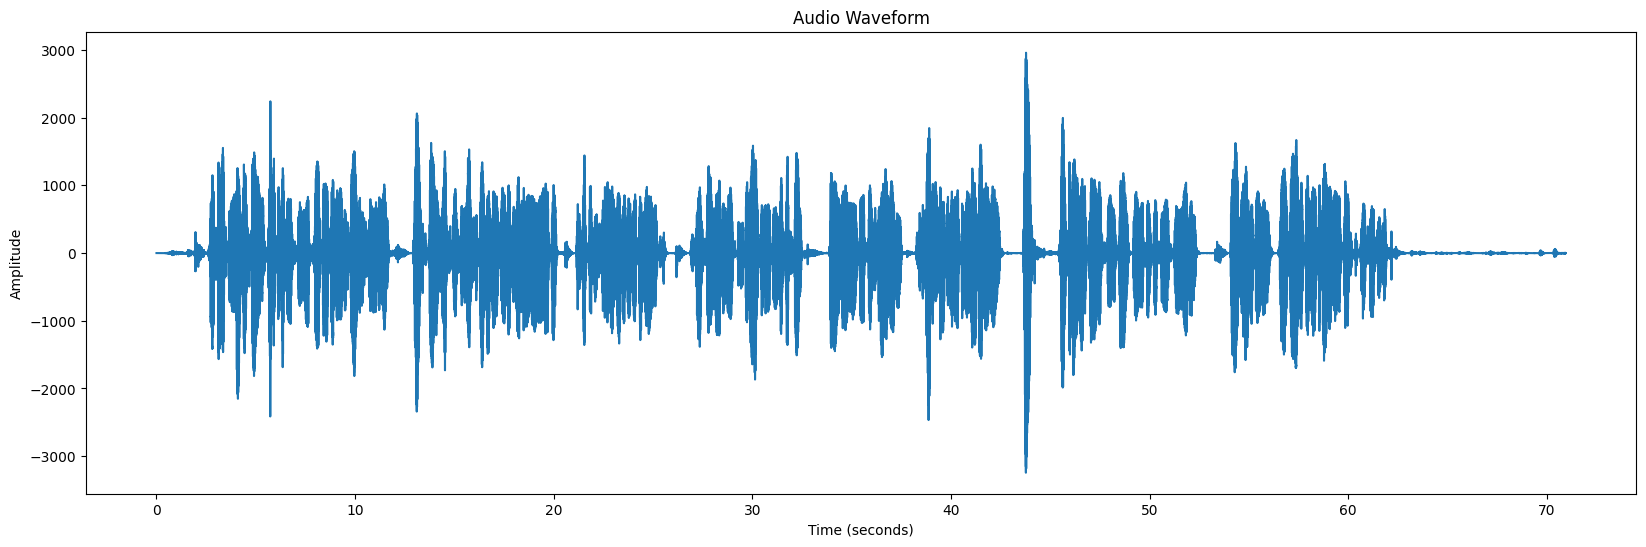

In [74]:
def plot_audio_wave(file_path):
    audio = wave.open(file_path)
    voice_fs = audio.getframerate()
    my_voice = np.frombuffer(audio.readframes(-1), dtype="int16")
    voice_time = np.linspace(0, (len(my_voice) - 1) / voice_fs, len(my_voice))
    
    plt.figure(figsize=(20, 6))
    plt.plot(voice_time, my_voice)
    plt.title('Audio Waveform')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    return voice_time, my_voice

# Example usage:
audio_file_path = 'Hekayat.wav'
voice_time, my_voice = plot_audio_wave(audio_file_path)

Interuptions are not due to any error!

You can Play the audio using the cell below:

In [29]:
import pyglet
import time
sound = pyglet.media.load("Hekayat.wav", "Hekayat.wav")
sound.play()
time.sleep(sound.duration)

KeyboardInterrupt: 

# 5.3:

This code snippet calculates and plots the normalized voice signal over time. It also prints the signal power and its logarithmic representation in decibels. 

Signal Power: 0.011515367493175116
Signal Power (dB): -38.774443954322614


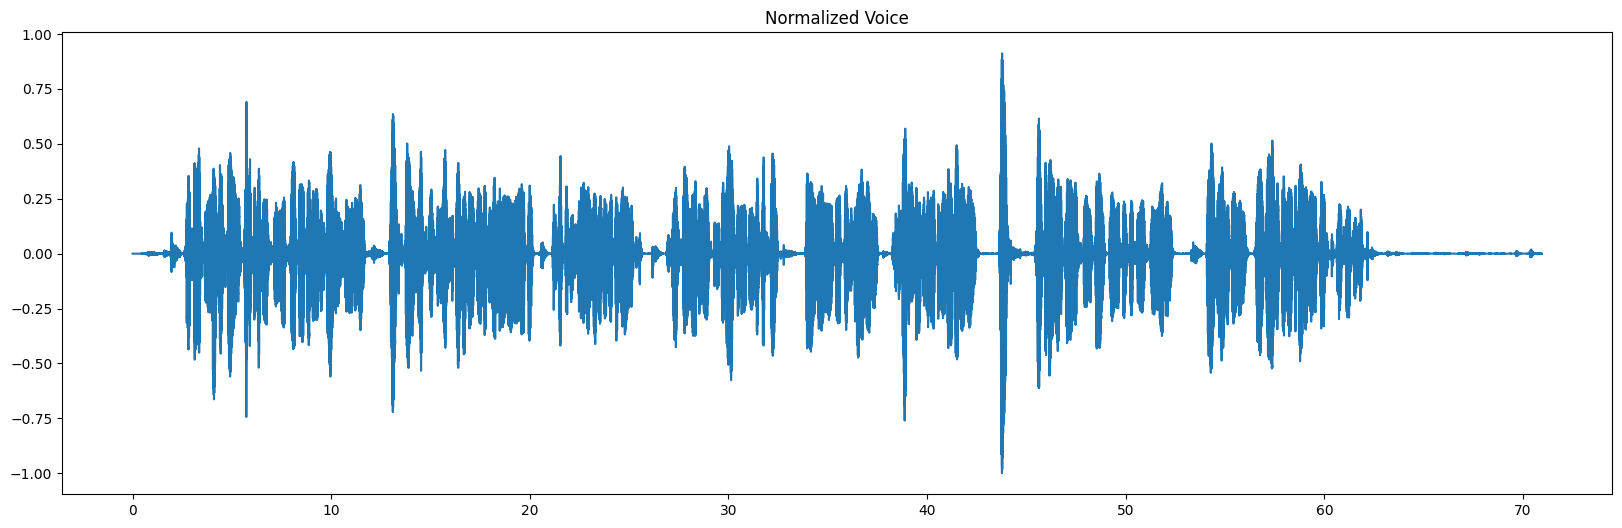

In [75]:
def signal_power_calc(input_signal):
    squared_signal = np.abs(input_signal) ** 2
    power = np.mean(squared_signal)
    return power

my_voice_normalized = my_voice / np.max(np.abs(my_voice))

plt.figure(figsize=(20, 6))

plt.plot(voice_time, my_voice_normalized)
plt.title("Normalized Voice")
print("Signal Power:", signal_power_calc(my_voice_normalized))
print("Signal Power (dB):", 20 * np.log10(signal_power_calc(my_voice_normalized)))


# 5.4:

In [76]:
def u_law_compressor(input_signal, mu):
    compressed_signal = np.sign(input_signal) * np.log(1 + mu * np.abs(input_signal)) / np.log(1 + mu)
    return compressed_signal


# 5.5:

In [77]:
def u_law_expander(input_signal, mu):
    input_abs = np.abs(input_signal)
    expanded_signal = (np.exp(input_abs * np.log(1 + mu)) - 1) / mu
    return expanded_signal * np.sign(input_signal)


# 5.6:

Code calculates the root mean square (RMS) difference between the original signal (my_voice_normalized) and the signal obtained after μ-law compression and expansion for various values of the compression parameter (mu). 

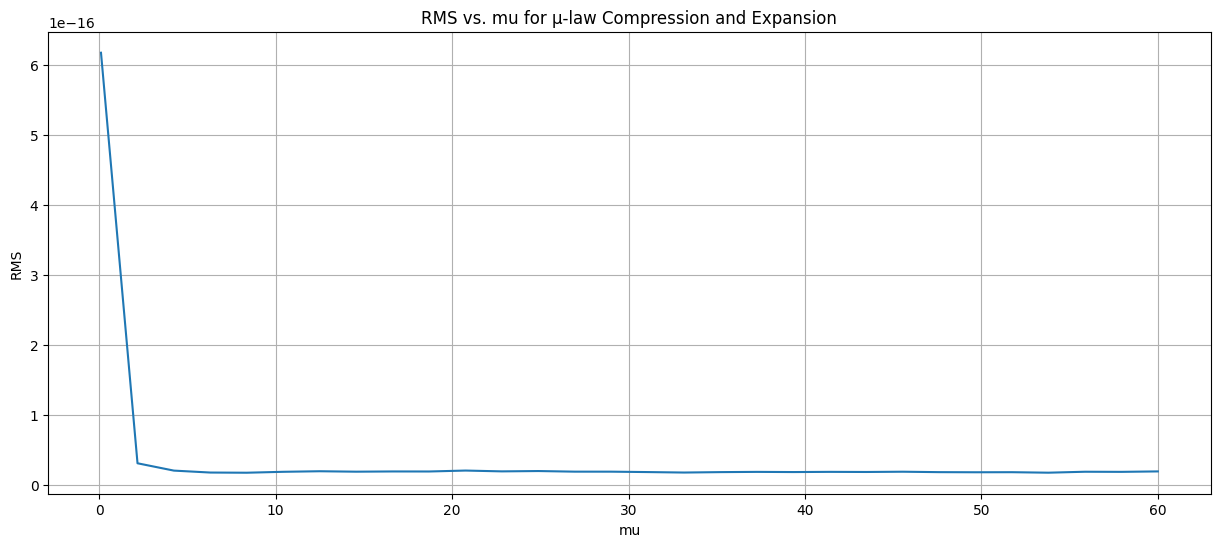

In [78]:
def calculate_rms(signal1, signal2):
    difference = np.abs(signal1 - signal2)
    rms = np.sqrt(np.mean(difference ** 2))
    return rms


mu_values = np.round(np.linspace(0.1, 60, 30), 2)

rms_results = []
for mu in mu_values:
    compressed_signal = u_law_compressor(my_voice_normalized, mu)
    expanded_signal = u_law_expander(compressed_signal, mu)
    rms_results.append(calculate_rms(expanded_signal, my_voice_normalized))

plt.figure(figsize=(15, 6))
plt.plot(mu_values, rms_results)
plt.xlabel("mu")
plt.ylabel("RMS")
plt.title("RMS vs. mu for μ-law Compression and Expansion")
plt.grid()
plt.show()


# 5.7:

The quantizer function is designed to quantize an input signal into a specified number of levels. Quantization is a process in which the continuous amplitude values of a signal are mapped to a finite set of discrete values. 

In [79]:
def quantizer(input_signal, num_levels, max_value=1, min_value=-1):
    delta = (max_value - min_value) / num_levels
    levels = np.linspace(min_value + (delta / 2), max_value - (delta / 2), num_levels)
    
    input_shifted = input_signal - min_value
    index = np.int_(np.minimum(np.maximum(np.floor(input_shifted / delta), 0), num_levels - 1))
    
    result = levels[index]
    quantization_error_variance = (delta ** 2) / 12
    
    return result, quantization_error_variance


# 5.8:

code calculates the Signal-to-Noise Ratio (SNR) in decibels for different values of quantization levels (l_vals). It quantizes the normalized voice signal using the quantizer function and compares the quantized signal with the original normalized voice signal. The SNR is a measure of how much the signal stands out from the noise.

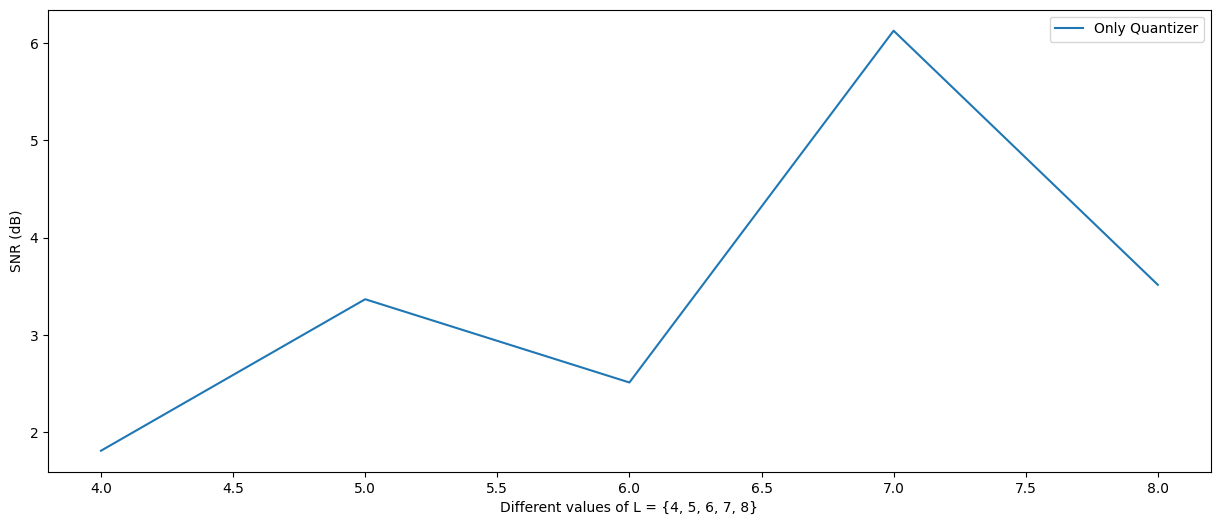

In [80]:

def calculate_snr_db(main_signal, noisy_signal):
    signal_power = signal_power_calc(main_signal)
    noise_power = signal_power_calc(noisy_signal - main_signal)
    
    if noise_power == 0:
        return -float('inf')
    
    snr_db = 10 * np.log10(signal_power / noise_power)
    return snr_db


l_vals = [4, 5, 6, 7, 8]

snr_results_no_compressor = []
for l in l_vals:
    quantized_signal = quantizer(my_voice_normalized, l)[0]
    snr_results_no_compressor.append(calculate_snr_db(quantized_signal, my_voice_normalized))

plt.figure(figsize=(15, 6))
plt.plot(l_vals, snr_results_no_compressor, label='Only Quantizer')
plt.xlabel("Different values of L = {4, 5, 6, 7, 8}")
plt.ylabel("SNR (dB)")
plt.legend()
plt.show()


# 5.9:

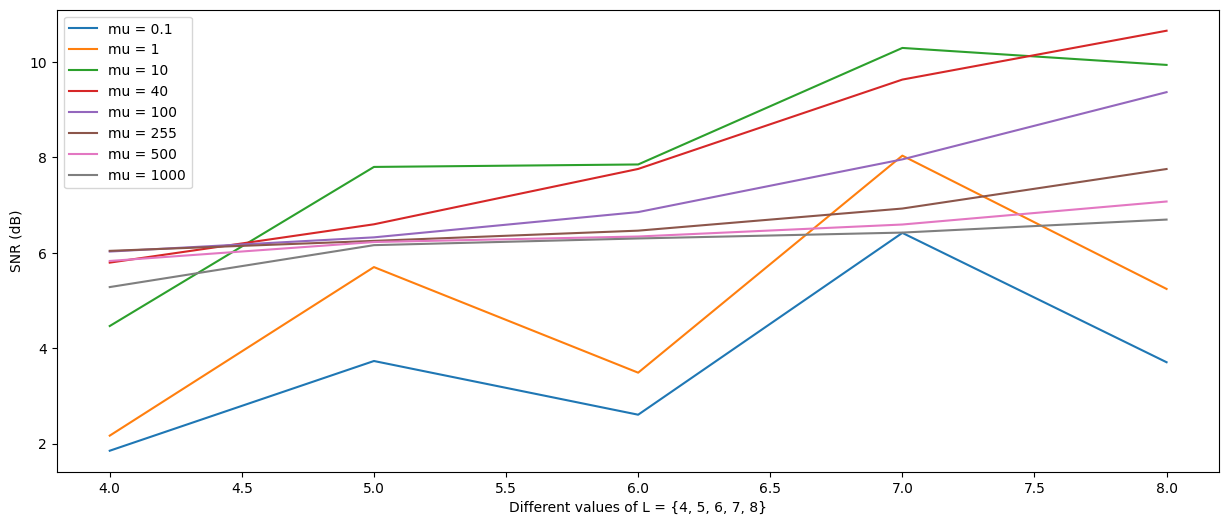

In [81]:
mu_vals = [0.1, 1, 10, 40, 100, 255, 500, 1000]
l_vals = [4, 5, 6, 7, 8]

plt.figure(figsize=(15, 6))    


for u in mu_vals:
    snr_results = []
    for l in l_vals:
        compressed_signal = ulaw_compressor(my_voice_normalized, u)
        quantized_signal = quantizer(compressed_signal, l)[0]
        expanded_signal = u_law_expander(quantized_signal, u)
        snr_results.append(calculate_snr_db(expanded_signal, my_voice_normalized))
    
    plt.plot(l_vals, snr_results, label=f'mu = {u}')

plt.legend()
plt.xlabel("Different values of L = {4, 5, 6, 7, 8}")
plt.ylabel("SNR (dB)")
plt.show()


# 5.10:

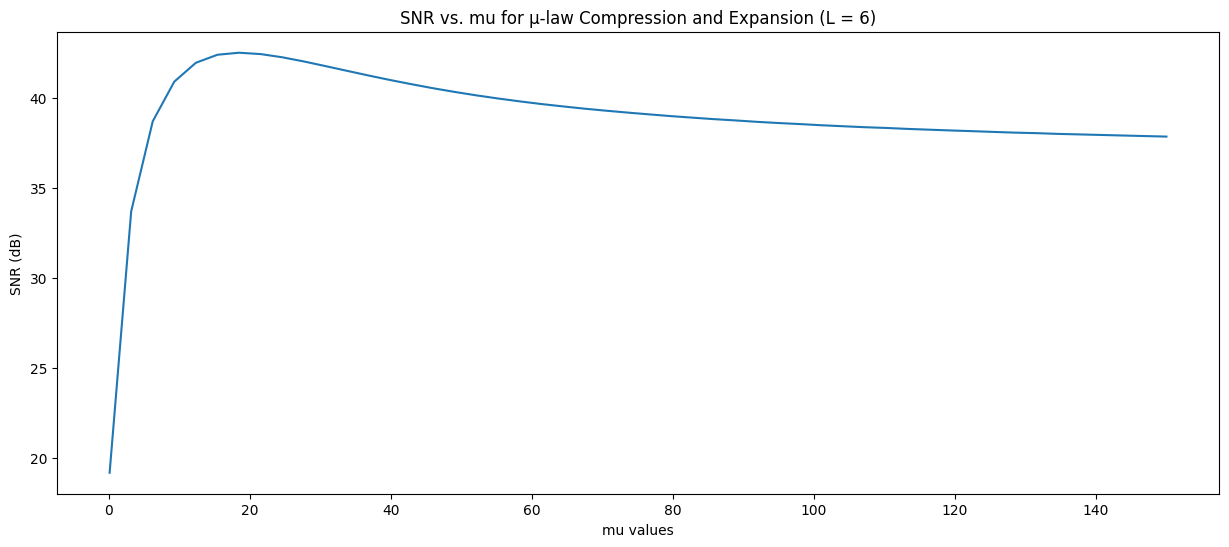

In [82]:

l_value = 6
mu_values = np.linspace(0.1, 150, 50)
snr_results = []

for u in mu_values:
    compressed_signal = ulaw_compressor(my_voice_normalized, u)
    quantized_signal = quantizer(compressed_signal, l_value)[0]
    expanded_signal = u_law_expander(quantized_signal, u)
    snr_results.append(20 * np.log(calculate_snr_db(expanded_signal, my_voice_normalized)))

plt.figure(figsize=(15, 6))
plt.plot(mu_values, snr_results)
plt.xlabel("mu values")
plt.ylabel("SNR (dB)")
plt.title("SNR vs. mu for μ-law Compression and Expansion (L = 6)")
plt.show()


# 5.11:

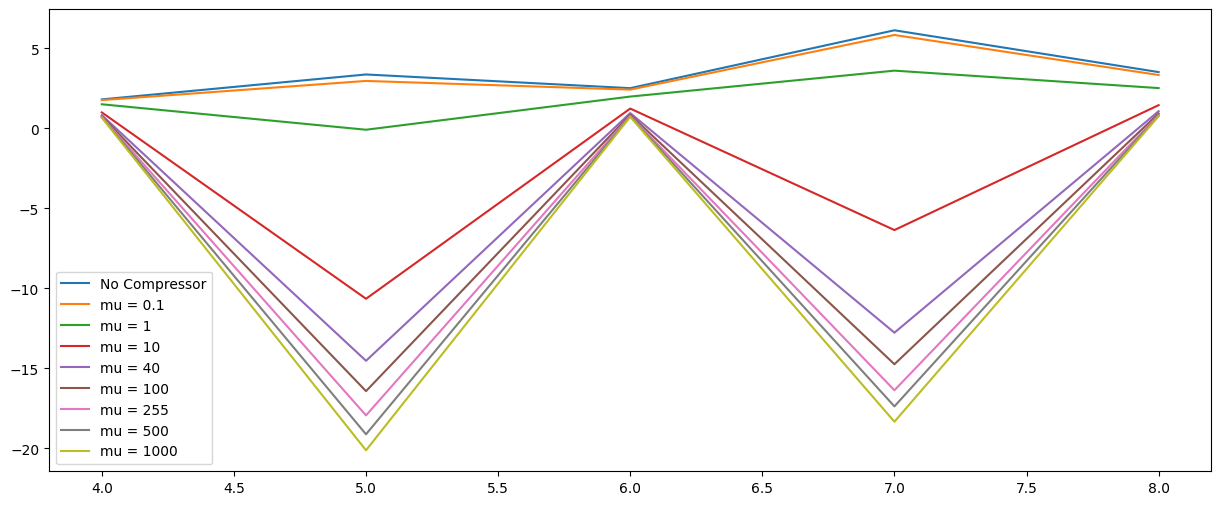

: 

In [83]:
mu_vals = [0.1, 1, 10, 40, 100, 255, 500, 1000]
l_vals = [4, 5, 6, 7, 8]
plt.figure(figsize=(15, 6))

snrResults = []
for l in l_vals:
    tempsig = quantizer(my_voice_normalized, l)[0]
    snrResults.append(calculate_snr_db(tempsig, my_voice_normalized))

plt.plot(l_vals, snrResults, label = 'No Compressor')
for u in mu_vals:
    snrResults = []
    for l in l_vals:
        tempsig = ulaw_compressor(quantizer(u_law_expander(my_voice_normalized, u), l)[0],u)
        snrResults.append(calculate_snr_db(tempsig, my_voice_normalized))
        
    plt.plot(l_vals, snrResults, label = ('mu = '+str(u)))
plt.legend()

When the Signal-to-Noise Ratio (SNR) is negative and descending, it indicates a degradation in the quality of the processed signal compared to the original signal. A negative SNR means that the noise level is higher than the signal level, resulting in poor performance. Let's break down why negative and descending SNR values are undesirable in this context:

Negative SNR:

A negative SNR implies that the power of the noise is greater than the power of the signal. This situation arises when the processing or compression introduces additional noise or distortion to the signal.
In communication and audio processing systems, a negative SNR suggests that the processed signal has a higher level of interference or artifacts, making it challenging to distinguish the desired signal from the noise.

Descending SNR:

When SNR values are descending with respect to varying parameters (such as quantization levels or compression parameters), it indicates that the degradation in signal quality worsens as you move along the parameter range.
In the context of the provided code, it suggests that increasing the quantization levels or adjusting compression parameters (μ values) is leading to more severe signal degradation.

Signal Degradation Causes:

High quantization levels can lead to a loss of information and introduce quantization errors, especially if the bit depth is insufficient to represent the signal accurately.
Inappropriate compression or expansion methods, such as μ-law compression and expansion, can introduce non-linear distortions that adversely affect the signal quality.

Impact on Applications:

In applications like audio processing, telecommunications, or data transmission, a negative and descending SNR can result in poor audio quality, reduced communication reliability, or data corruption.